## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [332]:
#!pip install -U pip
#!pip install -U imblearn
#!pip install importlib_metadata
#!pip install -U scikit-learn
#!pip install Catboost
#from importlib_metadata import version
#version('scikit-learn')

In [341]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

from xgboost import XGBRFClassifier as xgb
import lightgbm as lgbm
import statsmodels.api as sm
from imblearn import over_sampling
#from imblearn import under_sampling

from keras import backend as K
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import MaxPool1D, AvgPool1D, GlobalAvgPool1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import optimizers
from keras.optimizers import Adam, SGD
from keras.regularizers import l2, L1L2
import tensorflow as tf

from keras.layers.convolutional import Conv1D, MaxPooling1D


from collections import Counter
import itertools
from timeit import default_timer as timer

%matplotlib inline
pd.options.display.max_columns = 31
#plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("white")

filename='creditcard.csv'
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
run_cv=True #Everytime running cross validation is taking time. 
#So if you want to run the code with optimized Hyper Parameters then set this False

## <font color=blue> Section 1: Exploratory data analysis </font>

#### Getting data from kaggle to colab dataset.


#!pip install kaggle
from google.colab import files

#Choose the kaggle.json file that you downloaded
files.upload()

#Make directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

#{competitions,c,datasets,d,kernels,k,config}
#List of All Kaggle Competitions - Where I am Registered
#!kaggle competitions list

#kaggle competions list which has name creditcardfraud
#!kaggle competitions list -s creditcardfraud #No competetion exists

#search creditcardfraud dataset in kaggle
!kaggle datasets list -s creditcardfraud 
#Two datasets exits
#isaikumar/creditcardfraud  mlg-ulb/creditcardfraud

#Download creditcardfraud.zip file. file get downloaded in /content folder
!kaggle datasets download -d 'isaikumar/creditcardfraud'

#unzip creditcardfraud file
#Create a directory named train,
#!mkdir train
#!unzip creditcardfraud.zip -d train
!unzip creditcardfraud.zip

#Check whether creditcardfraud.csv exists in working folder on colab
!ls

#if creditcardfraud file is non kaggle file and load avaialbe on internet then it can be downloaded as below
#!wget "https://www.kaggle.com/mlg-ulb/creditcardfraud"

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
filename='/content/creditcard.csv'

In [179]:
df = pd.read_csv(filename)
print (df.shape)

(284807, 31)


In [180]:
#observe the different feature type present in the data
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
df.info()
#No Null Value. All the float fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.describe().T
#Range of all the fields not same. If we take data as given for modeling some variables will 
#have more influence on the model than other so scaling need to done

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
#Can we take time as primary key field?

temp=df.groupby('Time')['Class'].count()
temp.reset_index()
print(temp[temp>1].sort_values(ascending=False))
del temp

#Time Field cannot be treated as unique identifier because it has many duplicate entries.
#Can it be useful in prediction fraud?

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
104444.0     2
104438.0     2
104238.0     2
104139.0     2
0.0          2
Name: Class, Length: 79429, dtype: int64

Time Field cannot be treated as unique identifier because it has many duplicate entries.


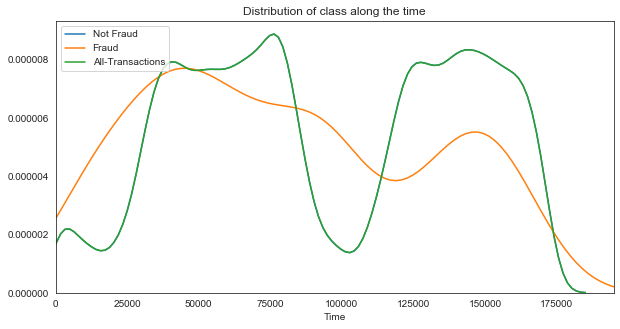

Duration  0.4834095000001071


In [18]:
#Distribution of class along the time
#fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,4))
start=timer()

plt.figure(figsize=(10,5))

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')

sns.distplot(df.Time,hist=False,rug=False,label='All-Transactions')
plt.title ("Distribution of class along the time")
plt.show()

end = timer()
print("Duration ",end - start)

#Distribution of data for fraud and non-faud transactions are different. So it looks it can be useful in predction.
#But time field need to be scaled

In [19]:
#Analysis of Amount Field

max_amount=int(round(max(df.Amount) *1.04,-3))
bins=list(range(0,1601,100))
bins.append(max_amount)
df['Amt']=pd.cut(df.Amount,bins)

df.pivot_table(index="Amt",columns="Class",values="V1",aggfunc=len)
#Almost no fraud transaction of value more than $1600
#Most of the fraud are of <=$100

Class,0,1
Amt,,
"(0, 100]",226139.0,335.0
"(100, 200]",27626.0,45.0
"(200, 300]",10754.0,22.0
"(300, 400]",5516.0,21.0
"(400, 500]",3375.0,7.0
"(500, 600]",2148.0,7.0
"(600, 700]",1430.0,5.0
"(700, 800]",1072.0,9.0
"(800, 900]",820.0,3.0


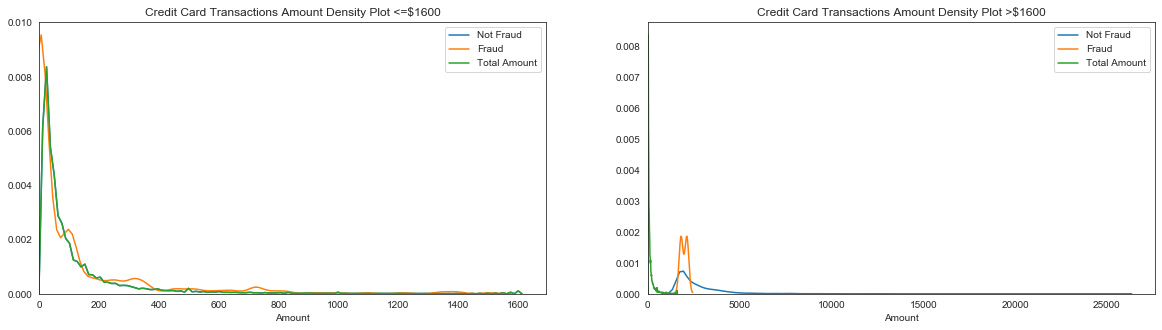

In [26]:
#fig,(ax1,ax2) = plt.subplots(ncols=3, figsize=(20,4))
plt.figure(figsize=(20,5))
plt.subplot(121)
class_0 = df.loc[ (df['Class'] == 0) & (df.Amount<=1600) ]["Amount"]
class_1 = df.loc[ (df['Class'] == 1) & (df.Amount<=1600) ]["Amount"]
class_All = df.loc[ (df.Amount<=1600) ]["Amount"]

sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')
sns.distplot(class_All,hist=False,rug=False,label='Total Amount')
plt.title('Credit Card Transactions Amount Density Plot <=$1600')

plt.subplot(122)
class_0 = df.loc[ (df['Class'] == 0) & (df.Amount>1600) ]["Amount"]
class_1 = df.loc[ (df['Class'] == 1) & (df.Amount>1600) ]["Amount"]
class_All = df.loc[ (df.Amount<=1600) ]["Amount"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')
sns.distplot(class_All,hist=False,rug=False,label='Total Amount')
plt.title('Credit Card Transactions Amount Density Plot >$1600')
plt.show()

#For <=$1600 fraud and non-fraud distribution is almost overlap. It mean any amount of transaction 
#can be fraud or non-fraud.
#For >$1600 there is some spike around $2500. It means transaction around $2500 are mose suspectible to be fraud.

#We need this field as well for prediction but we need to scale this as well.

Duration  8.20227339999974


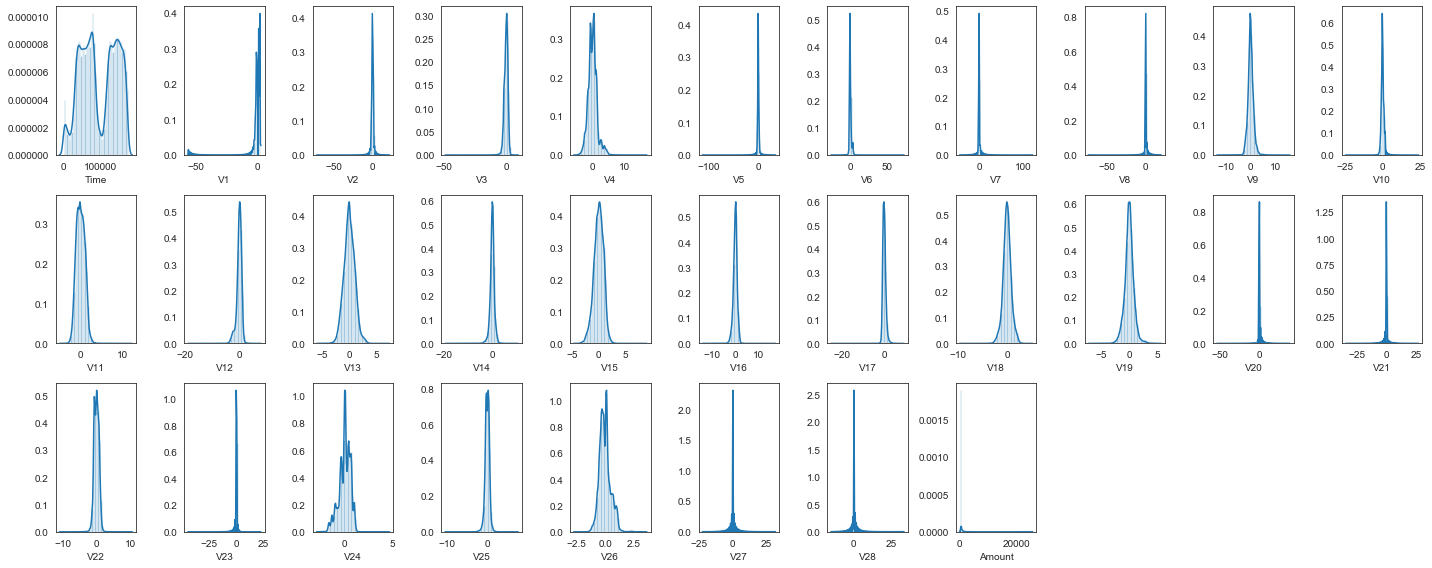

In [14]:
start = timer()
#Distribution of the data
plt.figure(figsize=(20,8))
i=1
for col in df.columns[0:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Except time and amount all fields looks having single peak bell curve. Allhough some of the fields are skwed right
#side and some looks skewed left side. So we can use power-transformer -yeo-johnson to handle this issue.

Here we will observe the distribution of our classes

In [27]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

amt=100*df.groupby("Class").sum()["Amount"] / sum(df.Amount)

print ("Normal Transaction {:.2f}  Fraud Transaction {:.2f}  ".format (classes[0],classes[1]))
print ("Normal Transaction {:.2f}%  Fraud Transaction {:.2f}%  ".format (normal_share,fraud_share))
print ("Value of Normal Transaction {:.2f}%  Fraud Transaction {:.2f}%  ".format (amt[0],amt[1]))

fraud_amt=df.loc[df['Class'] == 1]["Amount"]
print ("\nAverage Value {:.2f} Min Value {:.2f}  Max Value {:.2f} Fraud Transactions".format( np.average(fraud_amt), np.min(fraud_amt), np.max(fraud_amt)))

fraud_0amt_trans=len ( df.loc[  (df['Class'] == 1) & (df['Amount']==0)  ] )
print ("\n# Fraud Transactions of 0 Value = ",fraud_0amt_trans)

Normal Transaction 284315.00  Fraud Transaction 492.00  
Normal Transaction 99.83%  Fraud Transaction 0.17%  
Value of Normal Transaction 99.76%  Fraud Transaction 0.24%  

Average Value 122.21 Min Value 0.00  Max Value 2125.87 Fraud Transactions

# Fraud Transactions of 0 Value =  27


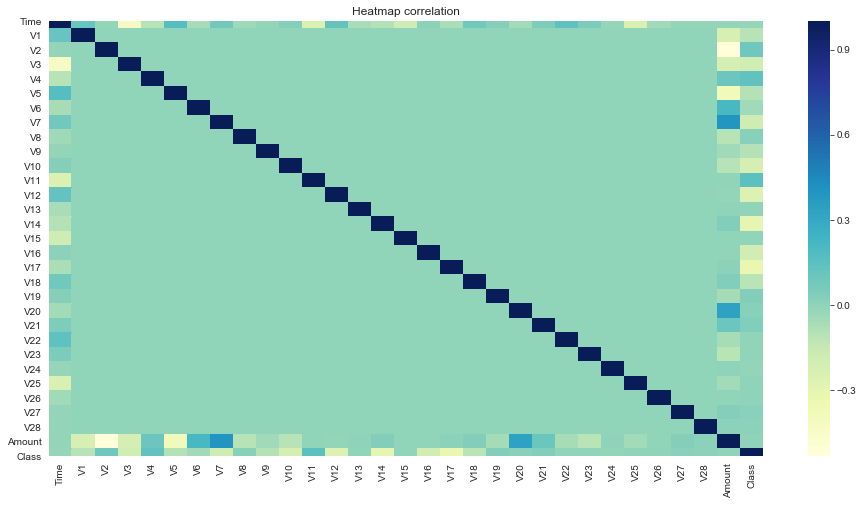

In [28]:
#Check Coorelation Between Different Variables
df_corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
#sns.set(font_scale=.5,style='white')

plt.title('Heatmap correlation')
plt.show()

#Since this is is PCA data it looks there is no relationship between the given variables. Except time and amount has
#some sort of relationship with other fields.

In [29]:
# Is there an relationship between variables and Class?
rank = pd.DataFrame(df_corr['Class']) #.sort_values(ascending=False)
rank['Relationship'] = rank.Class.apply(lambda x: "+" if x>0 else "-")
rank.Class=abs(rank.Class)
rank.rename(columns={"Class":"Degree"}, inplace=True)
rank.sort_values("Degree", ascending=False)

#Some variables show positive relationship with fraud and some negative. For example V17 & Fraud share share -ve
#relation. More the value of V17 lesser are the chances of this being fraud.
#V11 has +ve relationship. More the value of V11 more are the chances that transation is fraud.

,Degree,Relationship
Class,1.000000,+
V17,0.326481,-
V14,0.302544,-
V12,0.260593,-
V10,0.216883,-
V16,0.196539,-
V3,0.192961,-
V7,0.187257,-
V11,0.154876,+
V4,0.133447,+


#### <font color=red>Note 1: Because I don't have enough computing resources available (I tried nimblebox, google colab but that also too slow), therfore I am NOT using full given dataset for the model building.</font> </br>
#### <font color=red>Note 2: We need to have modular code to run same models with different parameters and differnt data imbalance treatment otherwise it will be extremely difficult to maintain the code. Therefore I have taken different approach. Which you can observer while scanning and running the code.
</font>

In [178]:
df.drop(columns="Amt", inplace=True) #This field was created for binning purpose so not required for modeling

In [181]:
#Training model on huge dataset taking too much time so taking 5% of data initially. 
#When code start working fine and start doing reasonable prediction disable below line
#If you have enough resources you can disable this cell

df = pd.concat([ df.sample(frac=.05, random_state=1),df.loc[df.Class==1] ])
print (df.shape)

(14732, 31)


Duration  1.8548877999983233


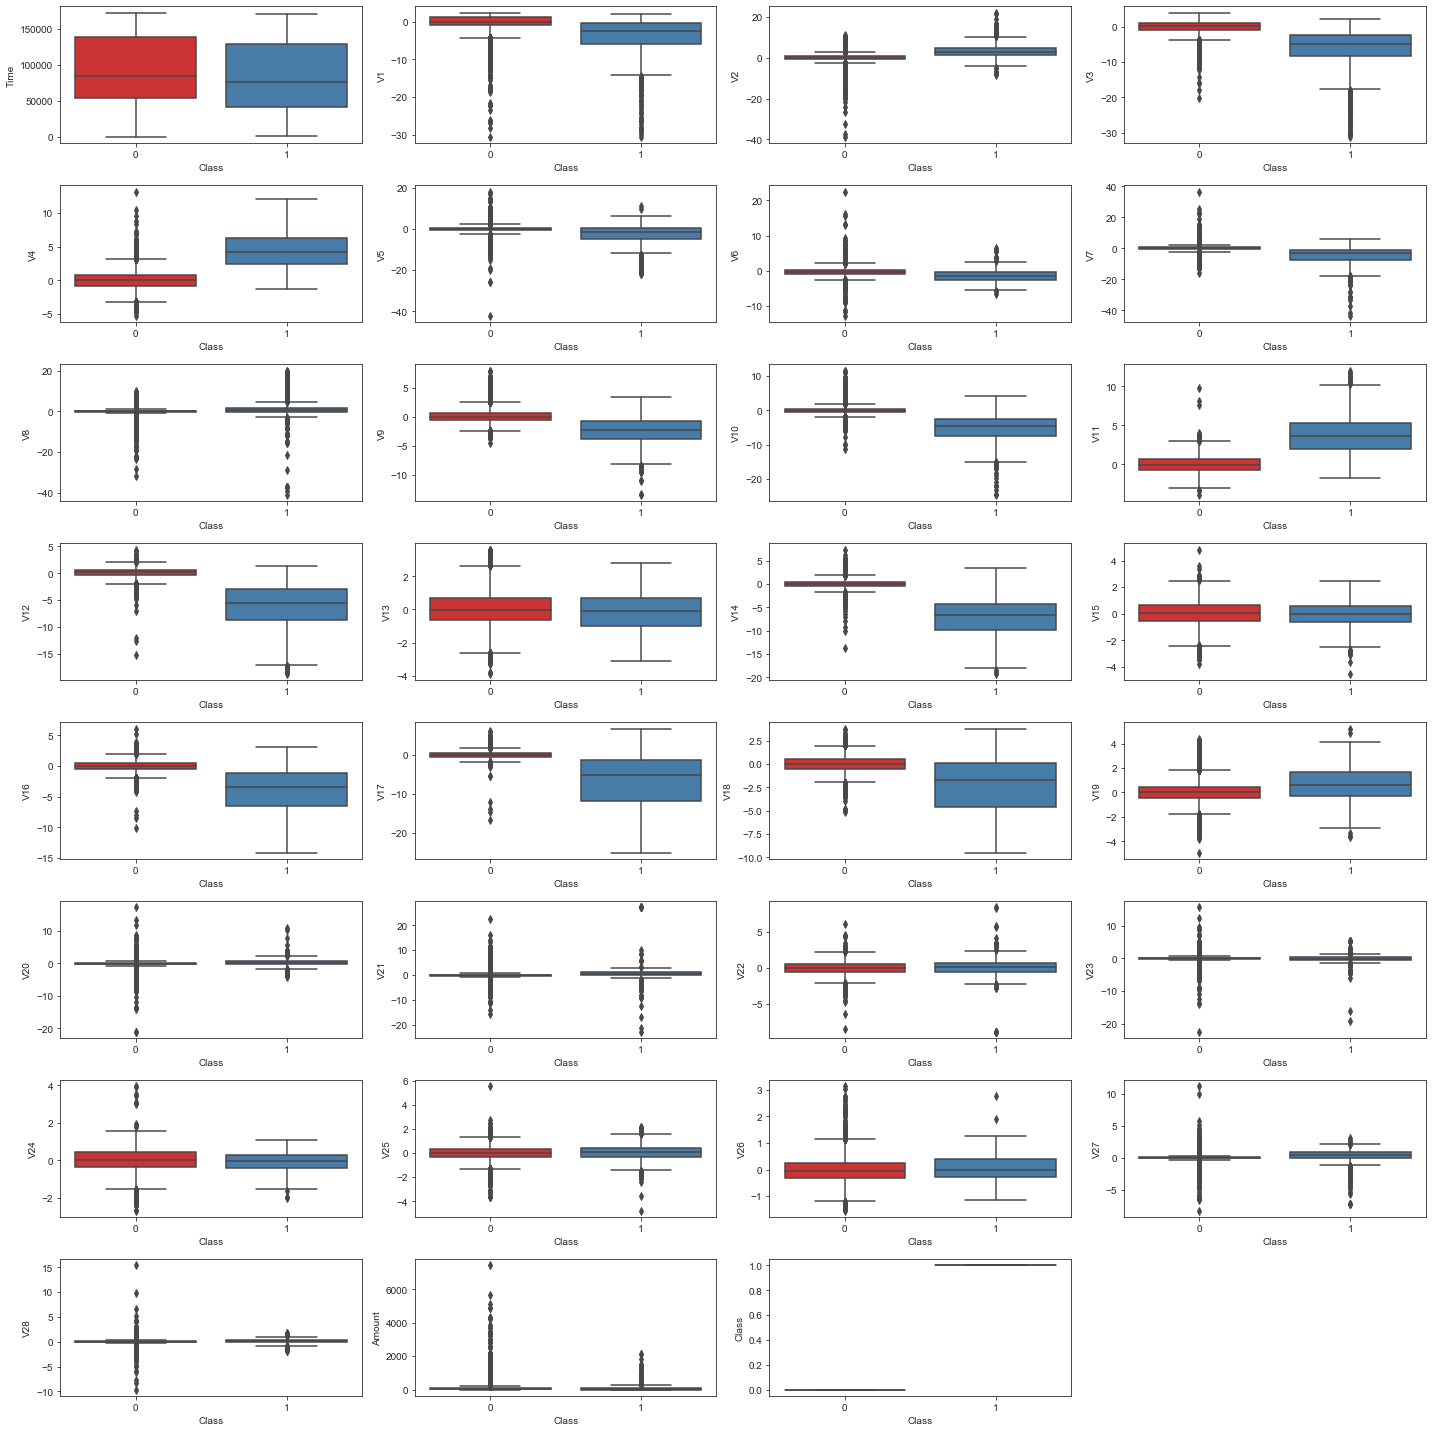

In [182]:
#Distribution of data acrros 2 Classes
start=timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20,20))
i=1

for col in df.columns:
    plt.subplot(8,4,i)
    ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha = 'center', va = 'center', 
                fontsize=8,
                xytext = (0, 10), textcoords = 'offset points')
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Almost all fields has outlier values.

Duration  28.883833900000354


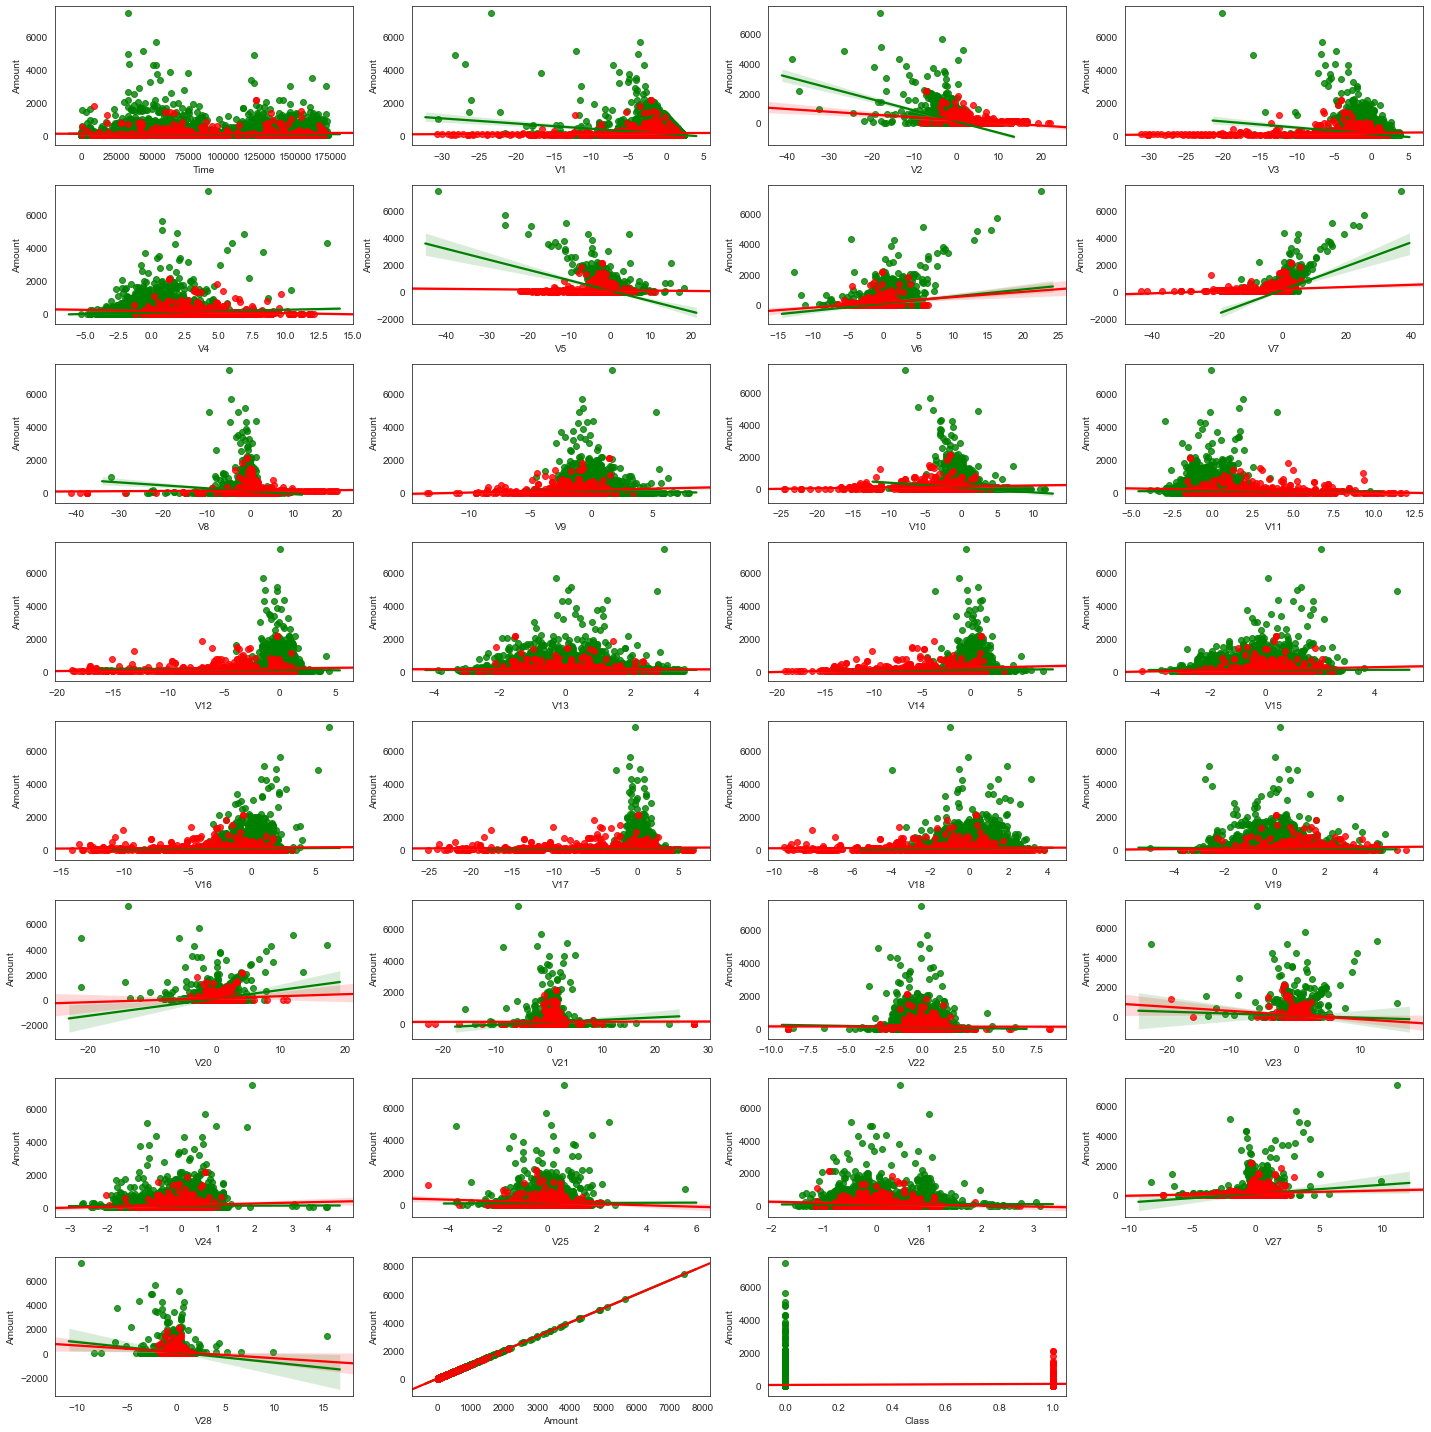

In [43]:
# Create a scatter plot to observe the distribution of classes with Amount
start=timer()

plt.figure(figsize=(20,20))
i=1
for col in df.columns:
    plt.subplot(8,4,i)
    
    sns.regplot(y=df[df.Class==0].Amount,x=df[df.Class==0][col], color="g")
    sns.regplot(y=df[df.Class==1].Amount,x=df[df.Class==1][col], color="r")
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#For most of the variables slope of amount field for fraud and non-fraud transaction is different. 
#For example v5 has -ve slop for non-fraud transactions and + slop for fraud transactions.

### Standard Scale All the Fields Including Time and Amount

In [183]:
cols2Scale = list(df.columns)
cols2Scale.remove("Class")

In [184]:
sc=StandardScaler()
t=sc.fit_transform(df[ cols2Scale ])
df[cols2Scale] = t
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.542165,-0.177345,-0.446889,0.030154,-0.228183,1.201262,-1.422117,0.234010,-0.295085,0.343262,0.150528,-0.750772,0.442264,0.619634,0.068656,-0.674005,-0.107599,-0.199274,-0.783185,-0.269573,-0.255168,-0.100090,0.054402,0.560594,0.045778,-4.178695,-0.439237,0.128913,0.621116,-0.366883,0
127467,-0.331670,-0.259693,0.624082,0.666552,-0.079212,-0.088448,-0.441464,0.248051,0.245784,-0.502037,-0.242045,-0.021675,0.537761,0.781292,0.330012,1.039792,0.031051,0.182048,-0.842735,-0.591388,-0.023590,-0.150447,-0.484577,0.126908,0.671032,-0.483813,0.140878,0.323596,0.174706,-0.366102,0
137900,-0.246697,-0.058260,0.521235,0.511859,-0.170388,0.387885,-0.354232,0.433936,-0.036744,-0.310330,-0.199713,-0.719470,0.187087,1.134460,-0.245658,0.938807,0.546127,-0.063311,0.090487,0.221716,0.242750,-0.317123,-1.013192,-0.193848,-0.813582,-0.025858,0.225411,0.499397,0.265961,-0.370581,0
21513,-1.311793,-0.468064,0.469844,0.858443,-1.025369,0.004749,-0.300565,0.422154,-0.017949,0.363467,0.305515,0.598643,-0.041322,-1.323179,0.120019,0.227397,0.685182,-0.409017,0.399852,-0.181219,0.378720,-0.237372,-0.550239,-0.366248,0.023474,0.447355,1.651165,0.194458,-0.001208,-0.308567,0
134700,-0.277369,0.588818,0.264123,-0.154097,0.424096,0.104763,-1.028762,0.273245,-0.162085,-0.009051,-0.298171,-0.017832,-0.132346,-0.625392,-0.554585,1.122121,0.540382,0.669377,0.376720,-0.458005,-0.142779,-0.180186,-0.565064,-0.123361,0.435239,1.049465,0.738112,-0.075573,0.125718,-0.371115,0


In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,14732.0,-4.646779e-17,1.000034,-1.978474,-0.849607,-0.210434,0.946203,1.653384
V1,14732.0,-6.039457e-17,1.000034,-12.324738,-0.327370,0.051949,0.597035,1.049218
V2,14732.0,-5.912897e-17,1.000034,-19.890465,-0.350989,-0.008073,0.386491,11.256507
V3,14732.0,4.837745e-16,1.000034,-13.287414,-0.341948,0.156732,0.534379,1.783252
V4,14732.0,-1.708517e-16,1.000034,-3.206814,-0.572477,-0.069034,0.395687,7.670043
V5,14732.0,-1.616576e-16,1.000034,-23.426401,-0.348161,0.024155,0.403421,10.168539
V6,14732.0,1.666145e-17,1.000034,-9.096731,-0.539360,-0.178573,0.307275,16.203026
V7,14732.0,2.214003e-16,1.000034,-20.953869,-0.198978,0.099392,0.358163,17.814875
V8,14732.0,1.264563e-17,1.000034,-23.148860,-0.117662,0.018177,0.197899,11.283861
V9,14732.0,-2.544726e-16,1.000034,-10.626995,-0.500331,0.009385,0.534383,6.371375


### Plotting the distribution of a variable- After Scaling

Duration  7.17826150000019


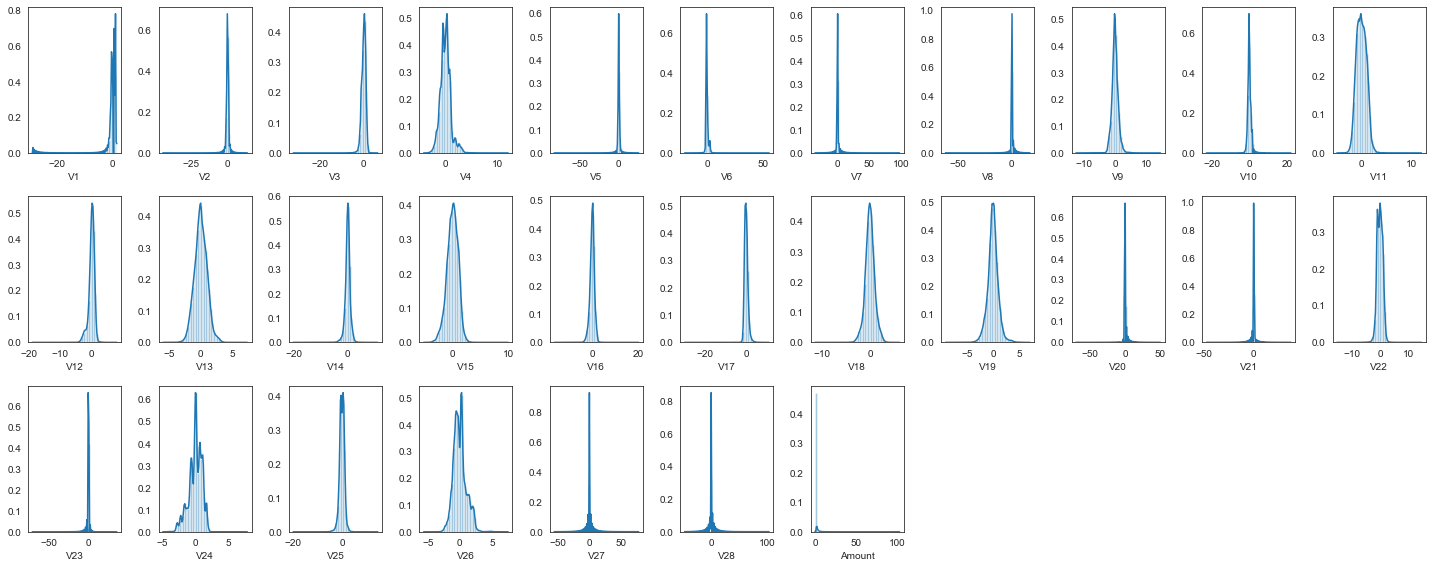

In [62]:
# plot the histogram of a variable from the dataset to see the skewness
#Distribution of the data
start=timer()

plt.figure(figsize=(20,8))
i=1
for col in df.columns[1:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

### Some fields are still skewed. So using PowerTransformer to fix that issue.
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [186]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
#'yeo-johnson’ [1], works with positive and negative values
#‘box-cox’ [2], only works with strictly positive values

df[cols2Scale] = power_transform(df[cols2Scale], method='yeo-johnson')

### Plotting the distribution of a variable- After Correcting Skweness Issue

Duration  6.814667299999201


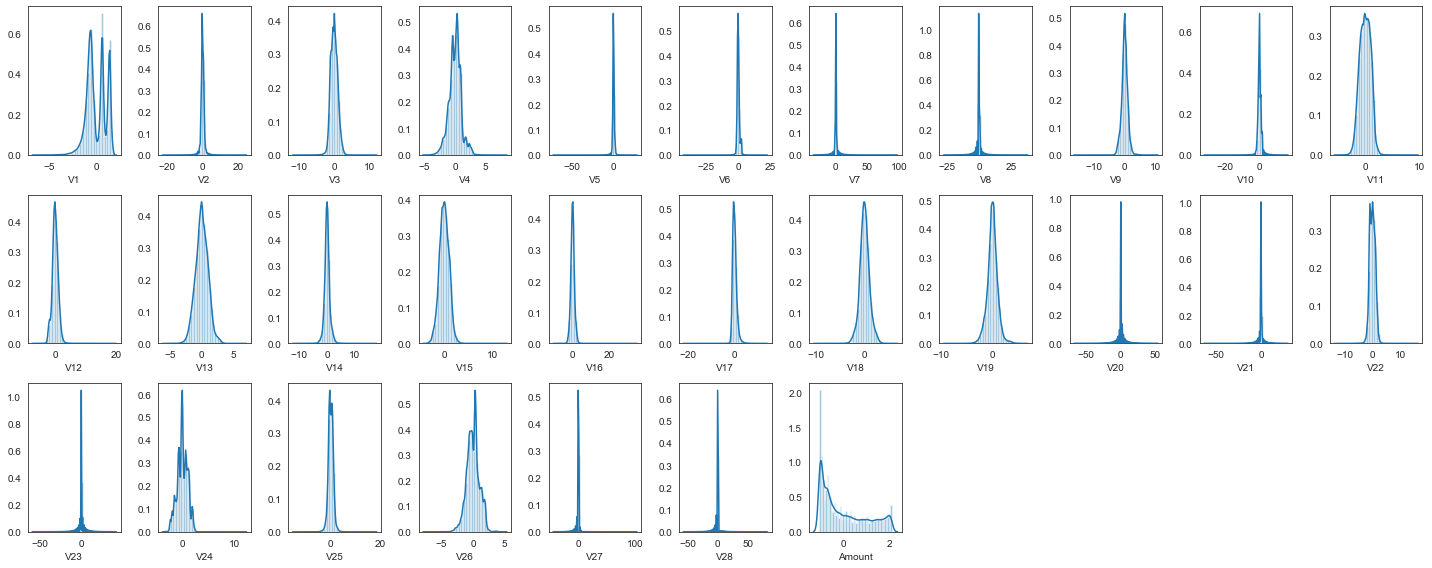

In [64]:
# plot the histogram of a variable from the dataset to see the skewness
#Distribution of the data
start=timer()

plt.figure(figsize=(20,8))
i=1
for col in df.columns[1:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start) 

### Check the outliers after fixing skewness & scale issue

Duration  2.8926565999991


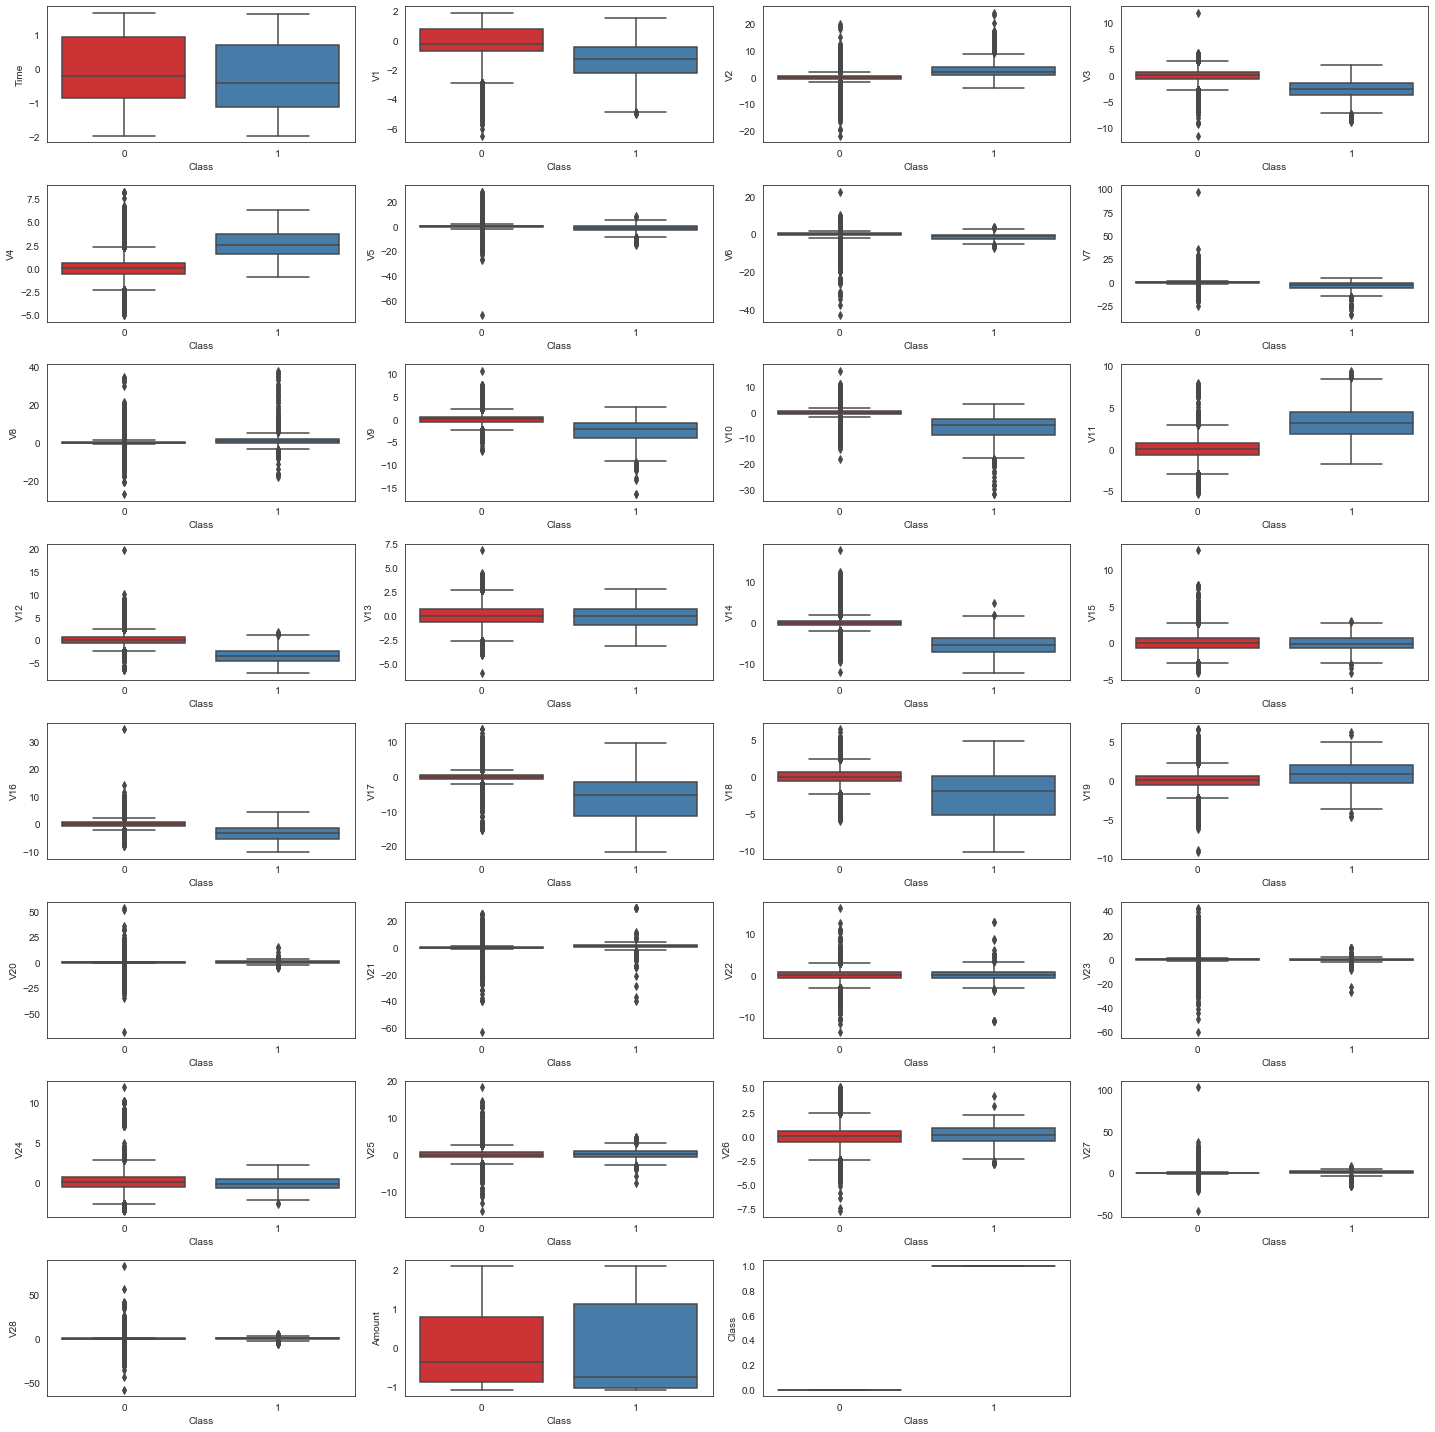

In [65]:
#Distribution of data acrros 2 Classes
start=timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20,20))
i=1

for col in df.columns:
    plt.subplot(8,4,i)
    ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha = 'center', va = 'center', 
                fontsize=8,
                xytext = (0, 10), textcoords = 'offset points')
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Many ields still has outlier values.

# <font color=blue> Section 2: Splitting the data into Train & Test

In [187]:
X= df.drop(columns=["Class"], axis=0)
y= df.Class #class variable

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)

In [188]:
ros = over_sampling.RandomOverSampler(random_state=100)
X_train_ros, y_train_ros       = ros.fit_resample(X_train1, y_train1)
X_test_ros,  y_test_ros        = ros.fit_resample(X_test1, y_test1)

smt = over_sampling.SMOTE(random_state=100)
X_train_smote, y_train_smote   = smt.fit_resample(X_train1, y_train1)
X_test_smote,  y_test_smote    = smt.fit_resample(X_test1, y_test1)

ada = over_sampling.ADASYN(random_state=100)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train1, y_train1)
X_test_adasyn,  y_test_adasyn  = ada.fit_resample(X_test1, y_test1)

# <font color=blue> Section 3: Select the Dataset Imbalancing Method</font>
Before you proceed for Section 4 this shall be done. It means every time you want to choose different imbalancing method you should start from here

## <font color=red> WARNING!!! Before you goto Section 4, Select which type of data you want to use for model.</font>

In [574]:
model_with_data_list=['Normal','RandomOverSampler','Smote','AdaSyn']
option=-1
while not (option>=0 and option<=3):
    i = input('0-Normal, 1-RandomOverSampler, 2-Smote, 3-AdaSyn ')
    try:
        option=int(i)
    except:
        option=-1    
        
if option==0:
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)
elif option==1:
    X_train, X_test, y_train, y_test = X_train_ros, X_test_ros, y_train_ros , y_test_ros
elif option==2:
    X_train, X_test, y_train, y_test = X_train_smote, X_test_smote, y_train_smote , y_test_smote
elif option==3:
    X_train, X_test, y_train, y_test = X_train_adasyn, X_test_adasyn, y_train_adasyn , y_test_adasyn

print ("\n\nRunning Model with ",model_with_data_list[option]," Data")

0-Normal, 1-RandomOverSampler, 2-Smote, 3-AdaSyn 2


Running Model with  Smote  Data


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [417]:
print(np.sum(y_train) + np.sum(y_test))
print(np.sum(y_train))
print(np.sum(y_test))

14210
10658
3552


# <font color=blue> Section 4: Model Building </font>

In [173]:
# Plotting cv results
def draw_cv_results(cv_df, param_name, metric_name, title_name, log_true):
    plt.figure(figsize=(10,4))
    
    if log_true:
        x_axis= np.log10( list(cv_df[param_name]))
        x_axis_title = "Log Value "+param_name
    else:
        x_axis = list(cv_df[param_name])
        x_axis_title = param_name
        
    plt.plot( x_axis, cv_df['mean_train_score'] )
    plt.plot( x_axis, cv_df['mean_test_score'] )
    plt.xlabel(x_axis_title)
    plt.ylabel(metric_name)
    plt.title(title_name)
    plt.legend(['Train ' + metric_name +' score', 'Test ' +metric_name+' score'], loc='upper left')


In [557]:
# Function to plot the confusion Matrix
def draw_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.tab10):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
   
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = 'd' 
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.fill(j,i,facecolor="red" if cm[i, j] < thresh else "blue", edgecolor='b', linewidth=2)
        #plt.Rectangle((0, 0), 1, 0, linewidth=1, edgecolor='b', facecolor='none')
        
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, weight="bold", 
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white", 
                 
                bbox=dict(facecolor='red', alpha=0.8))

    plt.tight_layout()
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

In [200]:
class_names=[0,1]
def draw_roc( actual, probs, prob_values=True, Threshold_limit=0.5 ):
    if prob_values:
        pred= probs.map(lambda x: 1 if x > Threshold_limit else 0)
    else:
        pred= probs
        
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                          drop_intermediate = False )
    
    auc_score = round( metrics.roc_auc_score( actual, probs) ,2)
    
    recall    = round( metrics.recall_score(actual,pred),2)
    precision = round(metrics.precision_score(actual, pred),2)
    f1= round(metrics.f1_score(actual,pred),2)
    print ("This Model Result is for ", model_with_data_list[option], " Data")
    print ("ROC AUC Score on Test:",auc_score)

    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic example',fontsize=20)
    plt.legend(loc="lower right")
    
    plt.subplot(1,2,2)
    cm = confusion_matrix(actual, pred)
    draw_confusion_matrix(cm,class_names)
    plt.show()

    return auc_score,recall,precision,f1

In [367]:
X_train.shape, y_train.shape

((21330, 30), (21330,))

### Model 1: Logistic Regression

In [ ]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    hyper_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

    lr = LogisticRegression(max_iter=1000, random_state=100)
    lr.fit(X_train, y_train)      

    model_cv_logistic = GridSearchCV(estimator=lr, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_logistic.fit(X_train,  y_train)

    cv_results_lr = pd.DataFrame(model_cv_logistic.cv_results_)
    print(cv_results_lr)
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    draw_cv_results(cv_results_lr, 'param_C', 'ROC AUC', 'Optimal C', True)

In [ ]:
if run_cv:
    model_cv_logistic.best_estimator_

In [418]:
#There are 29 variables in X_train. Let's see can we manage good result with lessor variables.
if option==0 or option==1:
    lr = LogisticRegression(C=.1,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for normal
elif option==2:
    lr = LogisticRegression(C=10,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for smote
else:
    lr = LogisticRegression(C=100,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for adasyn
rfe = RFE(lr,15) #Identify top 15 important variables
rfe.fit(X_train,y_train)
useful_cols = X_train.columns[rfe.support_]
print ("Useful Columns: " ,useful_cols)

Useful Columns:  Index(['Time', 'V3', 'V4', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15',
       'V16', 'V17', 'V22', 'V23'],
      dtype='object')


In [77]:
#check the ranking of these variables
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95


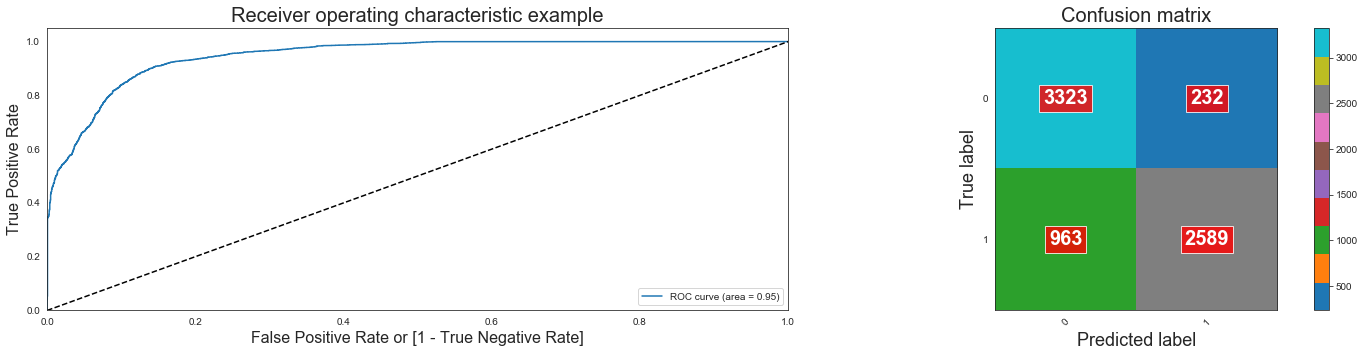

In [423]:
#Hyperparameter Turning of LogisticRegression
#Train the model with only 15 variables (identified in earlier step)

X_train_= X_train[useful_cols]
X_test_ = X_test[useful_cols]
lr = LogisticRegression(C=.1,max_iter=1000, random_state=100)
lr.fit(X_train_,y_train)

y_test_pred_logistic = lr.predict_proba(X_test_)
y_test_pred_logistic = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_logistic[:,1:2].reshape(-1) })

#check ROC_AUC Score on Test
logistic_auc_test, logistic_recall_test, logistic_precision_test, logistic_f1_test = \
                        draw_roc(y_test_pred_logistic.Class, y_test_pred_logistic.Class_Prob, True, .7)

### Model 2: GLM

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95


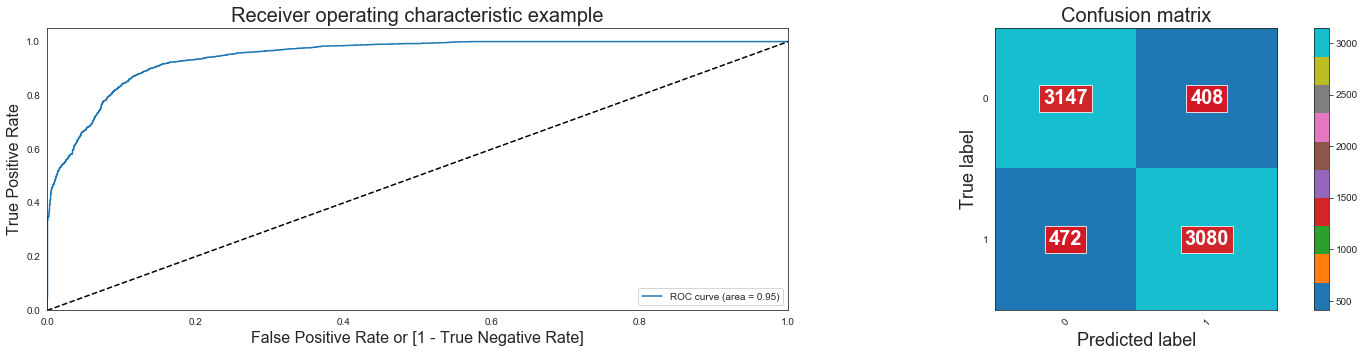

In [424]:
X_train_sm = sm.add_constant(X_train[useful_cols])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
glm = glm.fit()

X_test_sm = sm.add_constant(X_test_)
y_test_pred_glm = glm.predict( X_test_sm  )
y_test_pred_glm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_glm })

#check ROC_AUC Score on Test
glm_auc_test, glm_recall_test, glm_precision_test, glm_f1_test = \
                        draw_roc(y_test_pred_glm.Class, y_test_pred_glm.Class_Prob)

In [ ]:
glm.summary()

### Model 3: KNeighborsClassifier

In [ ]:
# Cross validation using different values of n_neighbors.
start=timer()

if run_cv:
    hyper_params = [{'n_neighbors': range(2,15,2) }]
    knn = KNeighborsClassifier()
    model_cv_knn = GridSearchCV(estimator=knn, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_knn.fit(X_train,  y_train)

    cv_results_knn = pd.DataFrame(model_cv_knn.cv_results_)
    print(cv_results_knn.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    draw_cv_results(cv_results_knn, 'param_n_neighbors', 'ROC AUC', 'Optimal n_neighbours', False)

In [ ]:
if run_cv:
    print(model_cv_knn.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.84


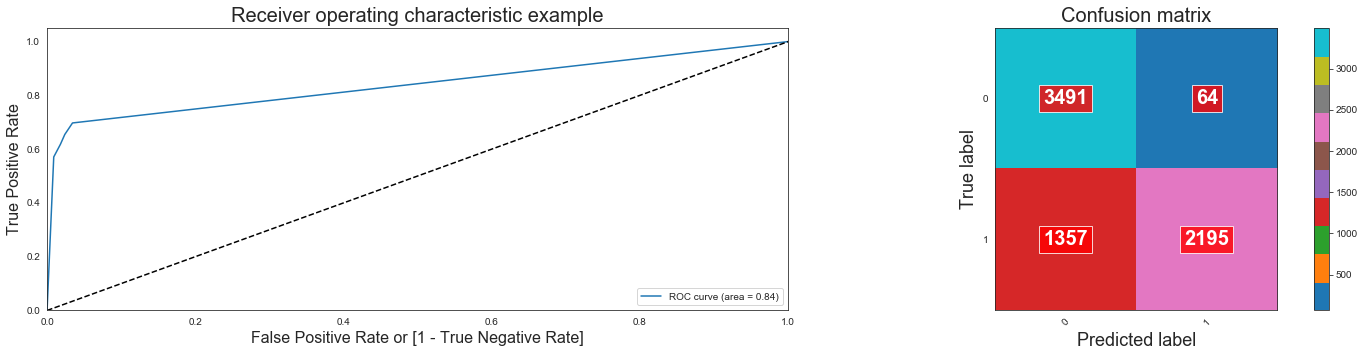

In [426]:
#Hyperparameter Turning of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, leaf_size=30, p=2)
knn.fit(X_train, y_train)
y_test_pred_knn = knn.predict_proba(X_test)

y_test_pred_knn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_knn[:,1:2].reshape(-1) })


knn_auc_test, knn_recall_test, knn_precision_test,knn_f1_test = \
                        draw_roc(y_test_pred_knn.Class, y_test_pred_knn.Class_Prob)


### Model 4: RandomForestClassifier

In [ ]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    hyper_params=[{'n_estimators':range(4,20,2),'max_depth':range(8,25,2)}]

    rfc = RandomForestClassifier()
    model_cv_rfc = GridSearchCV(estimator=rfc, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_rfc.fit(X_train,  y_train)

    cv_results_rfc = pd.DataFrame(model_cv_rfc.cv_results_)
    print(cv_results_rfc.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    cv_results_rfc.param_max_depth = cv_results_rfc.param_max_depth.astype("float")
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_max_depth', data=cv_results_rfc)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators', y='mean_train_score', hue='param_max_depth',data=cv_results_rfc, ci=0)
    ax2.set_title("Train AUC Score")
    plt.show()

In [ ]:
if run_cv:
    print(model_cv_rfc.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.96


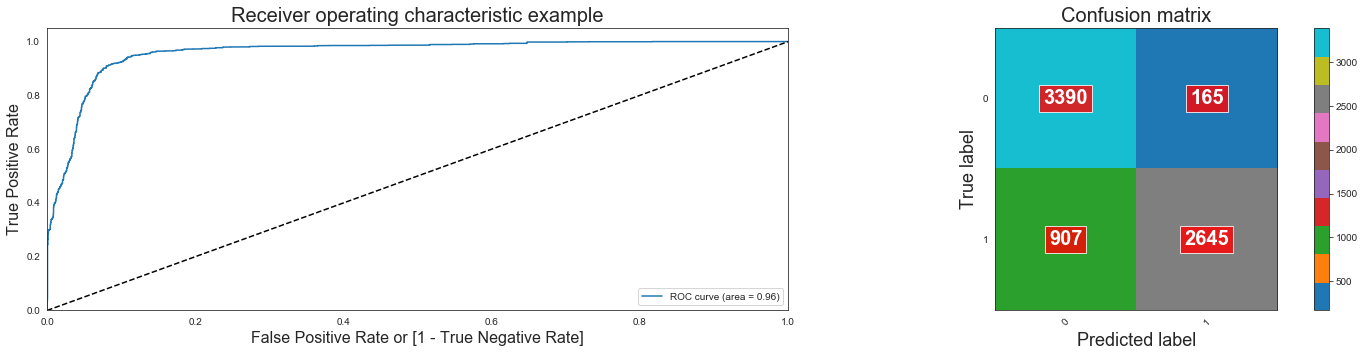

In [427]:
#Optimised Hyper Parameters
rfc= RandomForestClassifier(n_estimators=16, criterion="gini", max_depth=6, random_state=100)
rfc.fit(X_train,y_train)
y_test_pred_rfc = rfc.predict_proba(X_test)[:,1:2]

y_test_pred_rfc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_rfc.reshape(-1) })

rfc_auc_test, rfc_recall_test, rfc_precision_test, rfc_f1_test = \
                        draw_roc(y_test_pred_rfc.Class, y_test_pred_rfc.Class_Prob)

### Model 5: DecisionTreeClassifier

In [ ]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()

if run_cv:
    hyper_params=[{'max_depth': range(10,20,2),
               'min_samples_leaf': range(1, 5, 1),
               'min_samples_split': range(1, 5, 1) }]

    dtc = DecisionTreeClassifier(random_state=100)
    model_cv_dtc = GridSearchCV(estimator=dtc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_dtc.fit(X_train,  y_train)

    cv_results_dtc = pd.DataFrame(model_cv_dtc.cv_results_)
    print(cv_results_dtc.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    cv_results_dtc.param_max_depth = cv_results_dtc.param_max_depth.astype("float")

    plt.figure(figsize=(20,4))
    plt.subplot(1,4,1)
    ax1=sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,4,2)
    ax2= sns.lineplot(x='param_min_samples_leaf', y='mean_train_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax2.set_title("Train AUC Score")

    plt.subplot(1,4,3)
    ax1=sns.lineplot(x='param_min_samples_split', y='mean_test_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,4,4)
    ax2= sns.lineplot(x='param_min_samples_split', y='mean_train_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax2.set_title("Train AUC Score")
    plt.show()

In [ ]:
if run_cv:
    print(model_cv_dtc.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.79


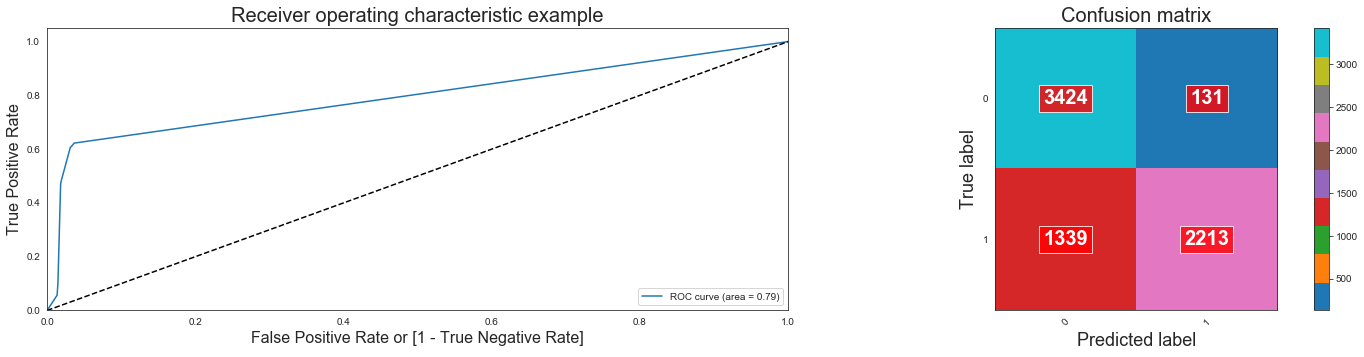

In [428]:
#Optimised Hyper Parameters
dtc= DecisionTreeClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=2, random_state=100)

dtc.fit(X_train,y_train)
y_test_pred_dtc = dtc.predict_proba(X_test)[:,1:2]

y_test_pred_dtc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_dtc.reshape(-1) })

dtc_auc_test, dtc_recall_test, dtc_precision_test, dtc_f1_test = \
                        draw_roc(y_test_pred_dtc.Class, y_test_pred_dtc.Class_Prob, True, .5)


### Model 6: LGBM

In [ ]:
# Cross validation using different values of n_estimators.
start=timer()
if run_cv:
    hyper_params=[{  'n_estimators': range(10,110,10)  }]

    lgbm_clf = lgbm.LGBMClassifier(random_state=100)
    model_cv_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_lgbm.fit(X_train,  y_train)

    cv_results_lbgm = pd.DataFrame(model_cv_lgbm.cv_results_)
    cv_results_lbgm.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    draw_cv_results(cv_results_lbgm, 'param_n_estimators', 'ROC AUC', 'Optimal n_estimator', False)

In [ ]:
if run_cv:
    print(model_cv_lgbm.best_estimator_)

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.99


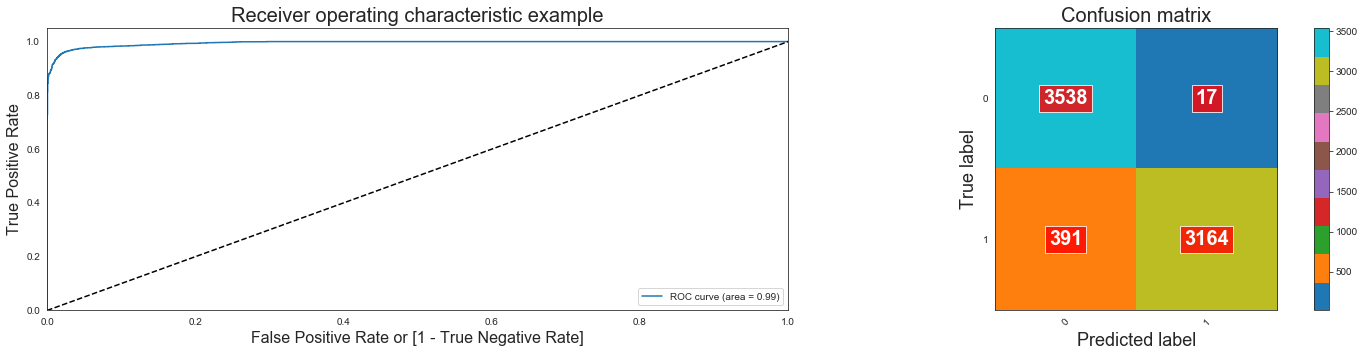

In [475]:
# Optimized Hyper Paramters.
lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42,)

lgbm_clf.fit(X_train,y_train)
y_test_pred_lgbm = lgbm_clf.predict_proba(X_test)[:,1:2]

y_test_pred_lgbm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_lgbm.reshape(-1) })

lgbm_auc_test, lgbm_recall_test, lgbm_precision_test, lgbm_f1_test = \
                        draw_roc(y_test_pred_lgbm.Class, y_test_pred_lgbm.Class_Prob,True,.5)

(0.99, 0.89, 0.99, 0.94)

### Model 7: Perceptron

In [ ]:
# Cross validation using different values of n_iter_no_change
start=timer()
if run_cv:
    hyper_params=[{'n_iter_no_change': [ 5,6,7,8,9] }]

    percept = Perceptron(random_state = 42)
    model_cv_percept = GridSearchCV(estimator=percept, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_percept.fit(X_train,  y_train)

    cv_results_percept = pd.DataFrame(model_cv_percept.cv_results_)
    cv_results_percept.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    draw_cv_results(cv_results_percept, 'param_n_iter_no_change', 'ROC AUC', 'Optimal n_estimator', False)

In [ ]:
if run_cv:
    print(model_cv_percept.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89


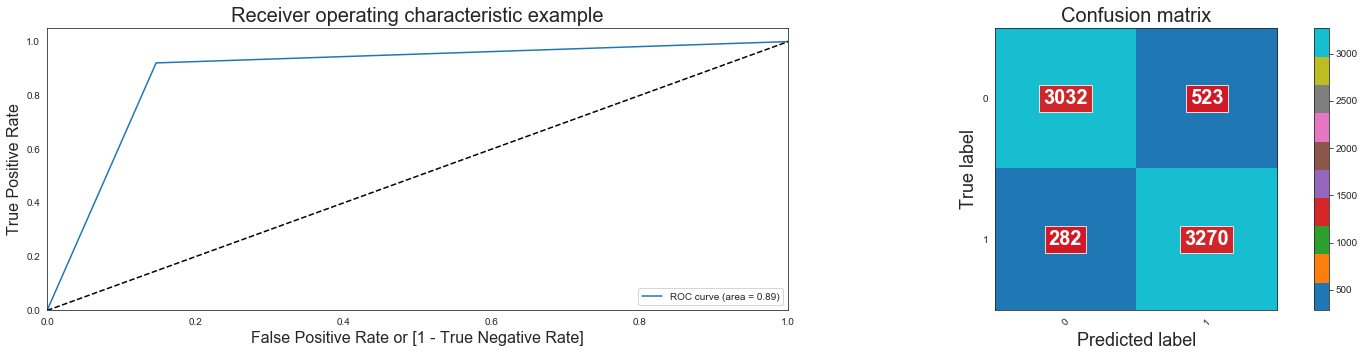

In [430]:
# Optmized Hyper Parameter
percept = Perceptron(alpha=.00001,n_iter_no_change=7,random_state = 42, penalty="l2")

percept.fit(X_train,y_train)
y_test_pred_percept = percept.predict(X_test)#[:,1:2]

y_test_pred_percept = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_percept.reshape(-1) })

percept_auc_test, percept_recall_test, percept_precision_test, percept_f1_test = \
                        draw_roc(y_test_pred_percept.Class, y_test_pred_percept.Class_Prob, False)

### Model 8: SVM

In [ ]:
#hyper_params=[{'C': range(1,30,1) }]
start=timer()
if run_cv:
    hyper_params=[{'C': range(10,30,2) }]

    svm = SVC(random_state = 100)
    model_cv_svm = GridSearchCV(estimator=svm, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_svm.fit(X_train,  y_train)

    cv_results_svm = pd.DataFrame(model_cv_svm.cv_results_)
    cv_results_svm.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    draw_cv_results(cv_results_svm, 'param_C', 'ROC AUC', 'Optimal n_estimator', False)

In [ ]:
if run_cv:
    print(model_cv_svm.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.76


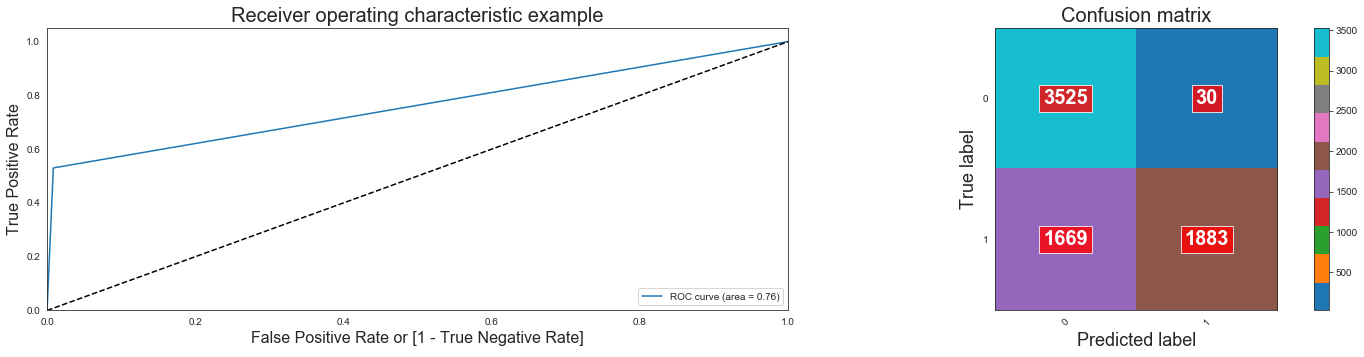

In [438]:
#Optimized Hyper Parameters
svm = SVC(C=20.0,random_state=100).fit(X_train,y_train)
y_test_pred_svm = svm.predict(X_test)#[:,1:2]
y_test_pred_svm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_svm.reshape(-1) })

svm_auc_test, svm_recall_test, svm_precision_test, svm_f1_test = \
                        draw_roc(y_test_pred_svm.Class, y_test_pred_svm.Class_Prob, False)

### Model 9: XGBoost

In [ ]:
#Cross Validation
start=timer()
if run_cv:
    hyper_params=[{'max_depth': range(10,15,1), 'n_estimators': range(95,120,2) }]

    xgb_clf = xgb(random_state = 100)
    model_cv_xgb = GridSearchCV(estimator=xgb_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_xgb.fit(X_train,  y_train)

    cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
    cv_results_xgb.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    cv_results_xgb.param_max_depth = cv_results_xgb.param_max_depth.astype("float")
    cv_results_xgb.param_n_estimators = cv_results_xgb.param_n_estimators.astype("float")
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_max_depth', data=cv_results_xgb)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators',  y='mean_train_score', hue='param_max_depth',data=cv_results_xgb)
    ax2.set_title("Train AUC Score")
    plt.show()

In [ ]:
if run_cv:
    print(model_cv_xgb.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.84


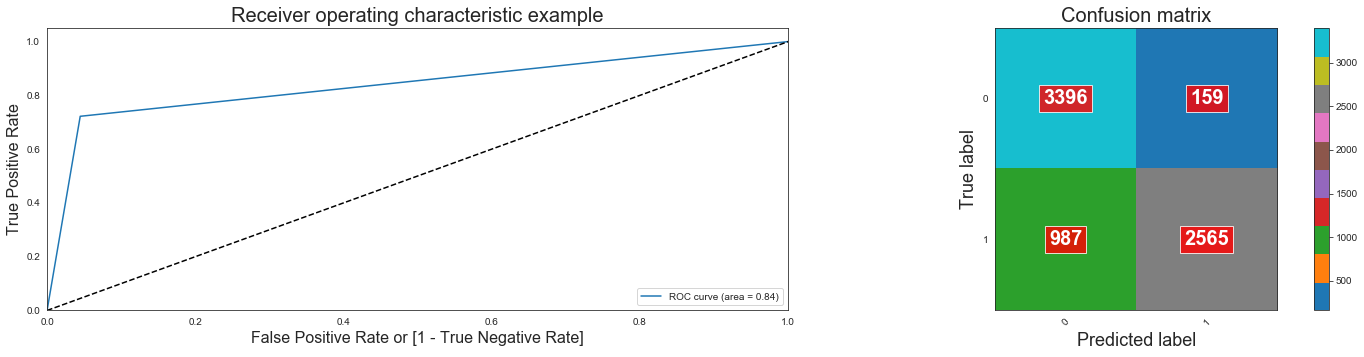

In [432]:
#Optimized Hyper Parameters
xgb_clf = xgb(max_depth=10, n_estimators=95, learning_rate=.01,random_state=100).fit(X_train,y_train)
y_test_pred_xgb = xgb_clf.predict(X_test)#[:,1:2]
y_test_pred_xgb = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_xgb.reshape(-1) })

xgb_auc_test, xgb_recall_test, xgb_precision_test, xgb_f1_test = \
                        draw_roc(y_test_pred_xgb.Class, y_test_pred_xgb.Class_Prob, True, .5)

### Modle 9: Adaboost

In [ ]:
#Cross Validation
sart=timer()
if run_cv:
    hyper_params=[{'learning_rate': range(1,5,1), 'n_estimators': range(40,71,10) }]

    adbc = AdaBoostClassifier(random_state = 100)
    model_cv_adbc = GridSearchCV(estimator=adbc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_adbc.fit(X_train,  y_train)

    cv_results_adbc = pd.DataFrame(model_cv_adbc.cv_results_)
    print(cv_results_adbc.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_learning_rate', data=cv_results_adbc)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators',  y='mean_train_score', hue='param_learning_rate',data=cv_results_adbc)
    ax2.set_title("Train AUC Score")
    plt.show()

In [ ]:
if run_cv:
    print(model_cv_adbc.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95


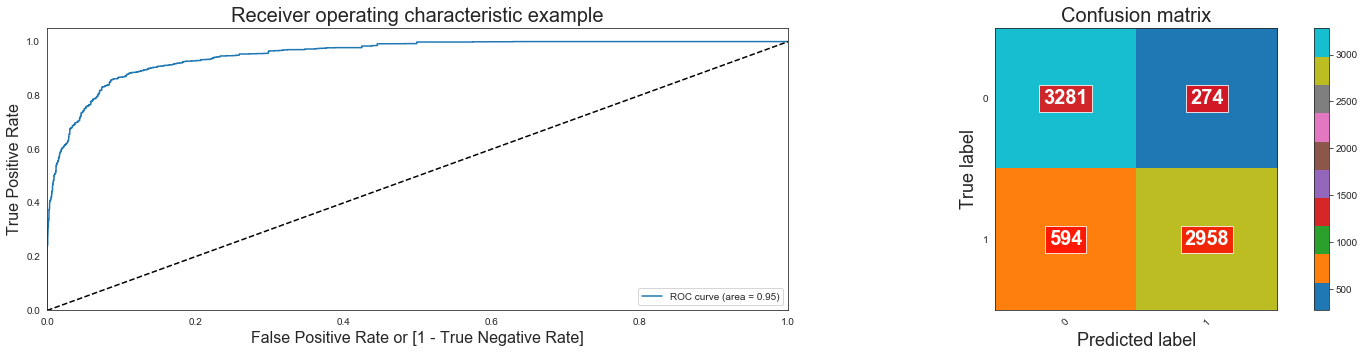

In [433]:
# Optimized Hyper Parameters
adbc = AdaBoostClassifier(learning_rate=1,random_state=100)
adbc.fit(X_train,y_train)

y_test_pred_adbc = adbc.predict_proba(X_test)[:,1:2]
y_test_pred_adbc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_adbc.reshape(-1) })

adbc_auc_test, adbc_recall_test, adbc_precision_test, adbc_f1_test = \
                        draw_roc(y_test_pred_adbc.Class, y_test_pred_adbc.Class_Prob,True,.5)

In [ ]:
adbc

### Modle 10: CatboostClassifier

In [439]:
# Optimized Hyper Parameters
catb_clf = CatBoostClassifier(learning_rate=1,random_state=100)
catb_clf.fit(X_train,y_train)

0:	learn: 0.3242346	total: 37.5ms	remaining: 37.5s
1:	learn: 0.2439783	total: 64.9ms	remaining: 32.4s
2:	learn: 0.1643081	total: 89.8ms	remaining: 29.8s
3:	learn: 0.1325041	total: 114ms	remaining: 28.3s
4:	learn: 0.1154277	total: 139ms	remaining: 27.6s
5:	learn: 0.0992203	total: 168ms	remaining: 27.9s
6:	learn: 0.0812991	total: 195ms	remaining: 27.6s
7:	learn: 0.0706372	total: 225ms	remaining: 27.9s
8:	learn: 0.0647106	total: 257ms	remaining: 28.3s
9:	learn: 0.0565416	total: 284ms	remaining: 28.1s
10:	learn: 0.0516344	total: 307ms	remaining: 27.6s
11:	learn: 0.0447504	total: 336ms	remaining: 27.6s
12:	learn: 0.0420474	total: 355ms	remaining: 27s
13:	learn: 0.0352606	total: 378ms	remaining: 26.6s
14:	learn: 0.0308379	total: 411ms	remaining: 27s
15:	learn: 0.0272237	total: 441ms	remaining: 27.1s
16:	learn: 0.0234531	total: 467ms	remaining: 27s
17:	learn: 0.0219181	total: 492ms	remaining: 26.8s
18:	learn: 0.0183242	total: 530ms	remaining: 27.4s
19:	learn: 0.0157026	total: 555ms	remaining:

161:	learn: 0.0020348	total: 3.85s	remaining: 19.9s
162:	learn: 0.0020312	total: 3.88s	remaining: 19.9s
163:	learn: 0.0019538	total: 3.91s	remaining: 19.9s
164:	learn: 0.0018879	total: 3.94s	remaining: 20s
165:	learn: 0.0018644	total: 3.97s	remaining: 20s
166:	learn: 0.0018427	total: 3.99s	remaining: 19.9s
167:	learn: 0.0018384	total: 4.01s	remaining: 19.9s
168:	learn: 0.0018312	total: 4.03s	remaining: 19.8s
169:	learn: 0.0018200	total: 4.06s	remaining: 19.8s
170:	learn: 0.0018179	total: 4.08s	remaining: 19.8s
171:	learn: 0.0018149	total: 4.11s	remaining: 19.8s
172:	learn: 0.0018134	total: 4.13s	remaining: 19.7s
173:	learn: 0.0018120	total: 4.15s	remaining: 19.7s
174:	learn: 0.0018107	total: 4.17s	remaining: 19.7s
175:	learn: 0.0018098	total: 4.2s	remaining: 19.7s
176:	learn: 0.0018091	total: 4.22s	remaining: 19.6s
177:	learn: 0.0018084	total: 4.24s	remaining: 19.6s
178:	learn: 0.0018076	total: 4.27s	remaining: 19.6s
179:	learn: 0.0018070	total: 4.29s	remaining: 19.5s
180:	learn: 0.001

320:	learn: 0.0007126	total: 7.36s	remaining: 15.6s
321:	learn: 0.0007098	total: 7.4s	remaining: 15.6s
322:	learn: 0.0007097	total: 7.42s	remaining: 15.5s
323:	learn: 0.0007054	total: 7.44s	remaining: 15.5s
324:	learn: 0.0007041	total: 7.46s	remaining: 15.5s
325:	learn: 0.0007040	total: 7.48s	remaining: 15.5s
326:	learn: 0.0007034	total: 7.5s	remaining: 15.4s
327:	learn: 0.0007033	total: 7.51s	remaining: 15.4s
328:	learn: 0.0007029	total: 7.53s	remaining: 15.4s
329:	learn: 0.0007027	total: 7.55s	remaining: 15.3s
330:	learn: 0.0007026	total: 7.58s	remaining: 15.3s
331:	learn: 0.0007013	total: 7.6s	remaining: 15.3s
332:	learn: 0.0007009	total: 7.62s	remaining: 15.3s
333:	learn: 0.0007007	total: 7.65s	remaining: 15.3s
334:	learn: 0.0007006	total: 7.67s	remaining: 15.2s
335:	learn: 0.0007006	total: 7.69s	remaining: 15.2s
336:	learn: 0.0007006	total: 7.7s	remaining: 15.2s
337:	learn: 0.0007006	total: 7.72s	remaining: 15.1s
338:	learn: 0.0007006	total: 7.74s	remaining: 15.1s
339:	learn: 0.00

483:	learn: 0.0005725	total: 10.7s	remaining: 11.4s
484:	learn: 0.0005725	total: 10.7s	remaining: 11.4s
485:	learn: 0.0005725	total: 10.8s	remaining: 11.4s
486:	learn: 0.0005725	total: 10.8s	remaining: 11.3s
487:	learn: 0.0005725	total: 10.8s	remaining: 11.3s
488:	learn: 0.0005725	total: 10.8s	remaining: 11.3s
489:	learn: 0.0005725	total: 10.8s	remaining: 11.3s
490:	learn: 0.0005671	total: 10.8s	remaining: 11.2s
491:	learn: 0.0005670	total: 10.9s	remaining: 11.2s
492:	learn: 0.0005670	total: 10.9s	remaining: 11.2s
493:	learn: 0.0005670	total: 10.9s	remaining: 11.2s
494:	learn: 0.0005670	total: 10.9s	remaining: 11.1s
495:	learn: 0.0005658	total: 10.9s	remaining: 11.1s
496:	learn: 0.0005654	total: 11s	remaining: 11.1s
497:	learn: 0.0005654	total: 11s	remaining: 11.1s
498:	learn: 0.0005653	total: 11s	remaining: 11.1s
499:	learn: 0.0005648	total: 11s	remaining: 11s
500:	learn: 0.0005611	total: 11.1s	remaining: 11s
501:	learn: 0.0005608	total: 11.1s	remaining: 11s
502:	learn: 0.0005607	tota

649:	learn: 0.0004316	total: 14.3s	remaining: 7.68s
650:	learn: 0.0004311	total: 14.3s	remaining: 7.66s
651:	learn: 0.0004286	total: 14.3s	remaining: 7.64s
652:	learn: 0.0004281	total: 14.3s	remaining: 7.62s
653:	learn: 0.0004278	total: 14.3s	remaining: 7.59s
654:	learn: 0.0004270	total: 14.4s	remaining: 7.57s
655:	learn: 0.0004266	total: 14.4s	remaining: 7.55s
656:	learn: 0.0004251	total: 14.4s	remaining: 7.53s
657:	learn: 0.0004250	total: 14.5s	remaining: 7.51s
658:	learn: 0.0004248	total: 14.5s	remaining: 7.49s
659:	learn: 0.0004244	total: 14.5s	remaining: 7.47s
660:	learn: 0.0004244	total: 14.5s	remaining: 7.45s
661:	learn: 0.0004242	total: 14.6s	remaining: 7.43s
662:	learn: 0.0004227	total: 14.6s	remaining: 7.41s
663:	learn: 0.0004225	total: 14.6s	remaining: 7.39s
664:	learn: 0.0004222	total: 14.6s	remaining: 7.37s
665:	learn: 0.0004222	total: 14.6s	remaining: 7.34s
666:	learn: 0.0004200	total: 14.7s	remaining: 7.32s
667:	learn: 0.0004198	total: 14.7s	remaining: 7.3s
668:	learn: 0

810:	learn: 0.0003410	total: 17.8s	remaining: 4.16s
811:	learn: 0.0003410	total: 17.9s	remaining: 4.13s
812:	learn: 0.0003410	total: 17.9s	remaining: 4.11s
813:	learn: 0.0003410	total: 17.9s	remaining: 4.08s
814:	learn: 0.0003410	total: 17.9s	remaining: 4.06s
815:	learn: 0.0003410	total: 17.9s	remaining: 4.04s
816:	learn: 0.0003392	total: 17.9s	remaining: 4.02s
817:	learn: 0.0003380	total: 18s	remaining: 4s
818:	learn: 0.0003377	total: 18s	remaining: 3.98s
819:	learn: 0.0003376	total: 18s	remaining: 3.96s
820:	learn: 0.0003372	total: 18.1s	remaining: 3.94s
821:	learn: 0.0003369	total: 18.1s	remaining: 3.91s
822:	learn: 0.0003368	total: 18.1s	remaining: 3.89s
823:	learn: 0.0003363	total: 18.1s	remaining: 3.87s
824:	learn: 0.0003362	total: 18.1s	remaining: 3.85s
825:	learn: 0.0003362	total: 18.2s	remaining: 3.83s
826:	learn: 0.0003362	total: 18.2s	remaining: 3.8s
827:	learn: 0.0003361	total: 18.2s	remaining: 3.78s
828:	learn: 0.0003361	total: 18.2s	remaining: 3.76s
829:	learn: 0.0003360	

974:	learn: 0.0002117	total: 21.5s	remaining: 550ms
975:	learn: 0.0002111	total: 21.5s	remaining: 528ms
976:	learn: 0.0002111	total: 21.5s	remaining: 506ms
977:	learn: 0.0002100	total: 21.5s	remaining: 484ms
978:	learn: 0.0002098	total: 21.5s	remaining: 462ms
979:	learn: 0.0002092	total: 21.6s	remaining: 440ms
980:	learn: 0.0002091	total: 21.6s	remaining: 418ms
981:	learn: 0.0002084	total: 21.6s	remaining: 396ms
982:	learn: 0.0002077	total: 21.6s	remaining: 374ms
983:	learn: 0.0002074	total: 21.7s	remaining: 352ms
984:	learn: 0.0002071	total: 21.7s	remaining: 330ms
985:	learn: 0.0002069	total: 21.7s	remaining: 308ms
986:	learn: 0.0002067	total: 21.7s	remaining: 286ms
987:	learn: 0.0002058	total: 21.8s	remaining: 264ms
988:	learn: 0.0002055	total: 21.8s	remaining: 242ms
989:	learn: 0.0002055	total: 21.8s	remaining: 220ms
990:	learn: 0.0002052	total: 21.8s	remaining: 198ms
991:	learn: 0.0002048	total: 21.9s	remaining: 176ms
992:	learn: 0.0002048	total: 21.9s	remaining: 154ms
993:	learn: 

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.97


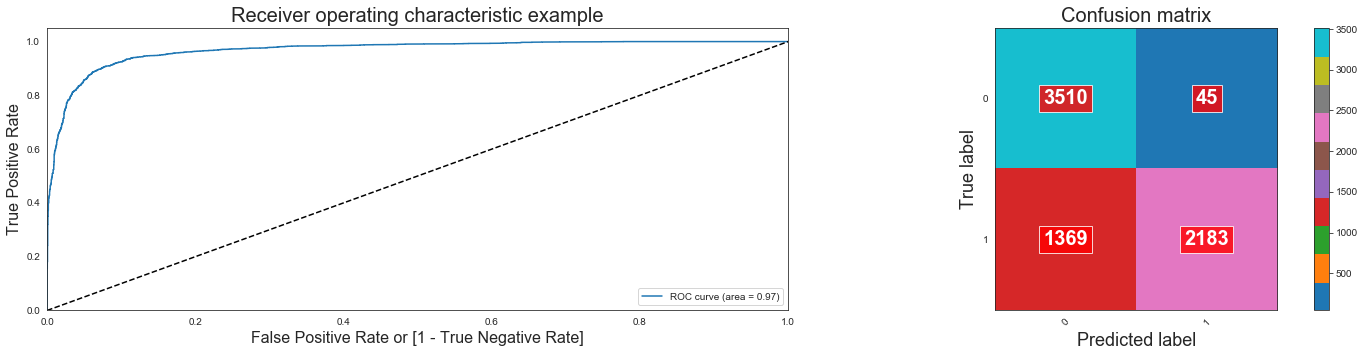

In [440]:
y_test_pred_catbc = catb_clf.predict_proba(X_test)[:,1:2]
y_test_pred_catbc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_catbc.reshape(-1) })

catbc_auc_test, catbc_recall_test, catbc_precision_test, catbc_f1_test = \
                        draw_roc(y_test_pred_catbc.Class, y_test_pred_catbc.Class_Prob,True,.5)

### Model 11: Naive Bayes

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89


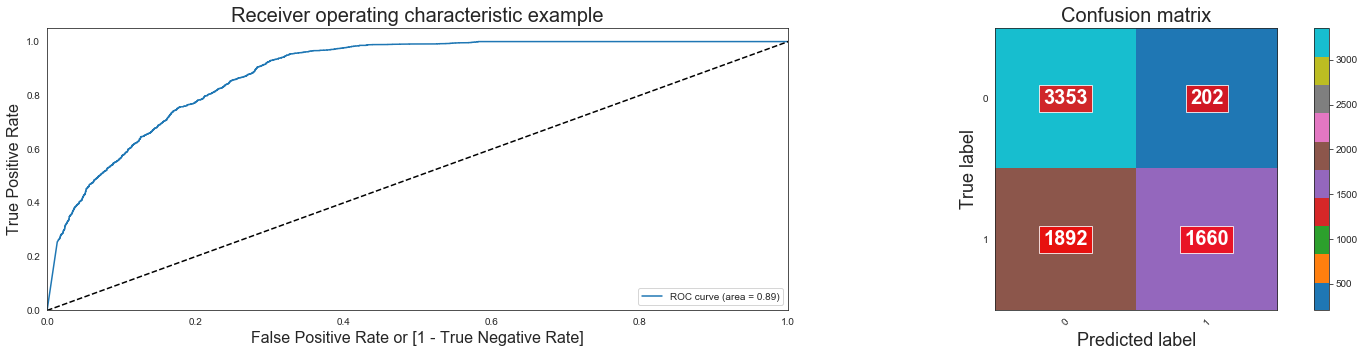

In [441]:
### Naive Bayes
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

y_test_pred_gnb = gnb.predict_proba(X_test)[:,1:2]
y_test_pred_gnb = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_gnb.reshape(-1) })

gnb_auc_test, gnb_recall_test, gnb_precision_test, gnb_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

In [356]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

### Model 12: Stochastic Gradient Descent 

In [ ]:
#Cross Validation
start=timer()
if run_cv:
    hyper_params = [{ 'alpha': [10 ** x for x in range(-3, 1)],
                    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.9, 0.95, 1] }]
    sgd = SGDClassifier(random_state=0, class_weight='balanced',\
                        loss='log', penalty='elasticnet')

    model_cv_sgd = GridSearchCV(estimator=sgd, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_sgd.fit(X_train,  y_train)

    cv_results_sgd = pd.DataFrame(model_cv_sgd.cv_results_)
    cv_results_sgd.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

In [ ]:
if run_cv:
    print(model_cv_sgd.best_estimator_)

In [ ]:
#draw_cv_results(cv_results_sgd, 'param_alpha', 'Recall', 'Optimal Alpha', False)
if run_cv:
    cv_results_sgd.param_l1_ratio = cv_results_sgd.param_l1_ratio.astype("float")
    cv_results_sgd.param_alpha = cv_results_sgd.param_alpha.astype("float")

    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x= np.log(cv_results_sgd['param_alpha']), y='mean_test_score', hue='param_l1_ratio',data=cv_results_sgd)
    ax1.set_xlabel="Log Param_Alpha"
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x=np.log(cv_results_sgd['param_alpha']), y='mean_train_score', hue='param_l1_ratio',data=cv_results_sgd)
    ax2.set_xlabel="Log Param_Alpha"
    ax2.set_title("Train AUC Score")
    plt.show()

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89


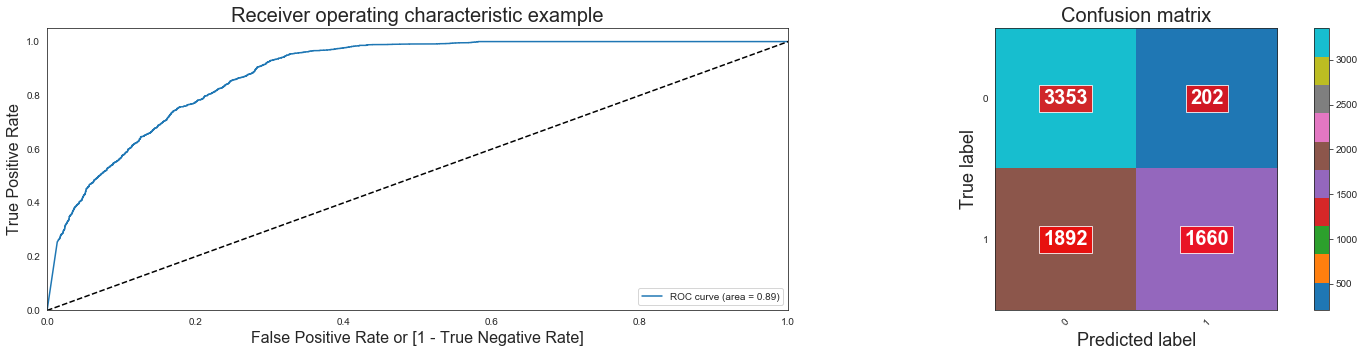

In [442]:
#Hyperparamter Tuning
sgd = SGDClassifier(max_iter=1000, random_state=100, penalty="elasticnet", alpha=0.0001, l1_ratio=0.2)
sgd.fit(X_train, y_train) 

y_test_pred_sgd = sgd.predict(X_test) #[:,1:2]
y_test_pred_sgd = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_sgd  }) #.reshape(-1)

sgd_auc_test, sgd_recall_test, sgd_precision_test, sgd_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

### Model 13:  Dense Neural Network

In [443]:
def create_dnn(indput_dim, dropout=0.2):
    model = Sequential([
    Dense(units=16, input_dim=indput_dim, activation='relu'),
    Dropout(dropout),
    Dense(units=16, activation='relu'),
    Dropout(dropout),
    Dense(1, activation='sigmoid')])
    return model

dnn = create_dnn(indput_dim=X_train.shape[1], dropout=0.2)
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(X_train, y_train,batch_size=100, epochs=50)

Epoch 1/50
21323/21323 [==============================] - 1s 32us/step - loss: 0.5780 - accuracy: 0.6964
Epoch 2/50
21323/21323 [==============================] - 0s 20us/step - loss: 0.3411 - accuracy: 0.8675
Epoch 3/50
21323/21323 [==============================] - 0s 18us/step - loss: 0.2522 - accuracy: 0.9032
Epoch 4/50
21323/21323 [==============================] - 0s 19us/step - loss: 0.1967 - accuracy: 0.9266
Epoch 5/50
21323/21323 [==============================] - 0s 19us/step - loss: 0.1666 - accuracy: 0.9407
Epoch 6/50
21323/21323 [==============================] - 0s 20us/step - loss: 0.1383 - accuracy: 0.9533
Epoch 7/50
21323/21323 [==============================] - 0s 19us/step - loss: 0.1207 - accuracy: 0.9616
Epoch 8/50
21323/21323 [==============================] - 0s 19us/step - loss: 0.1065 - accuracy: 0.9700
Epoch 9/50
21323/21323 [==============================] - 0s 21us/step - loss: 0.0939 - accuracy: 0.9735
Epoch 10/50
21323/21323 [==============================

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.86


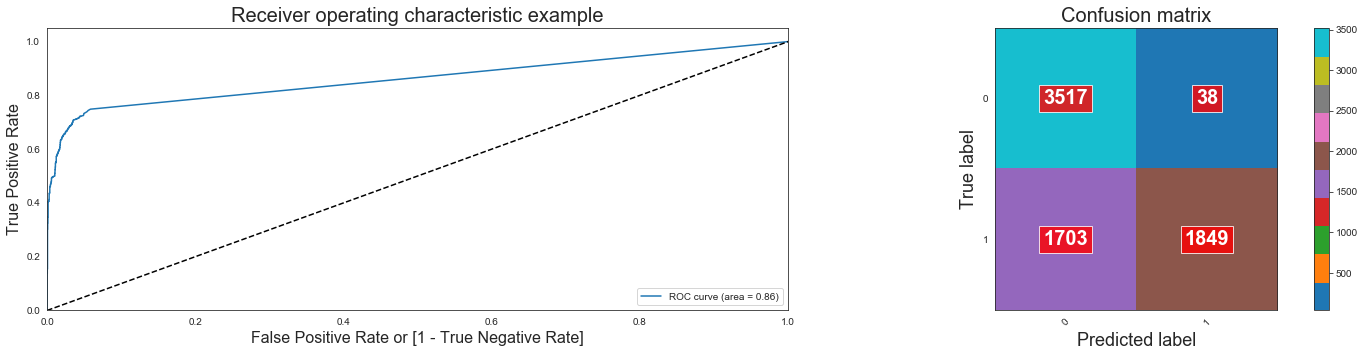

In [444]:
y_test_pred_dnn = dnn.predict(X_test).ravel()
y_test_pred_dnn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_dnn  }) #.reshape(-1)

dnn_auc_test, dnn_recall_test, dnn_precision_test, dnn_f1_test = \
                        draw_roc(y_test_pred_dnn.Class, y_test_pred_dnn.Class_Prob,True)

### Model 14:  Convolution Neural Network

In [449]:
def create_dnn(indput_dim, dropout=0.2):
    cnn = Sequential()
    cnn.add(Conv1D(128, kernel_size = ( 5), activation='relu', padding="same",input_shape=(30, 1) ))
    cnn.add(layers.GlobalMaxPool1D())
    cnn.add(BatchNormalization())
    
    cnn.add(Dense(30,  activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    return cnn

xtrain = X_train.values.reshape(X_train.shape[0],X_train.shape[1],-1)
xtest  = X_test.values.reshape(X_test.shape[0],X_test.shape[1],-1)

cnn = create_dnn(indput_dim=xtrain.shape[1], dropout=0.2)
cnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(xtrain, y_train,batch_size=5000, epochs=50)

Epoch 1/50
21323/21323 [==============================] - 3s 118us/step - loss: 0.6293 - accuracy: 0.6510
Epoch 2/50
21323/21323 [==============================] - 2s 102us/step - loss: 0.5860 - accuracy: 0.7055
Epoch 3/50
21323/21323 [==============================] - 2s 96us/step - loss: 0.5551 - accuracy: 0.7298
Epoch 4/50
21323/21323 [==============================] - 2s 99us/step - loss: 0.5295 - accuracy: 0.7487
Epoch 5/50
21323/21323 [==============================] - 2s 106us/step - loss: 0.5087 - accuracy: 0.7784
Epoch 6/50
21323/21323 [==============================] - 2s 99us/step - loss: 0.4906 - accuracy: 0.7872
Epoch 7/50
21323/21323 [==============================] - 2s 99us/step - loss: 0.4739 - accuracy: 0.7947
Epoch 8/50
21323/21323 [==============================] - 2s 100us/step - loss: 0.4591 - accuracy: 0.8007
Epoch 9/50
21323/21323 [==============================] - 2s 106us/step - loss: 0.4449 - accuracy: 0.8048
Epoch 10/50
21323/21323 [=========================

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.76


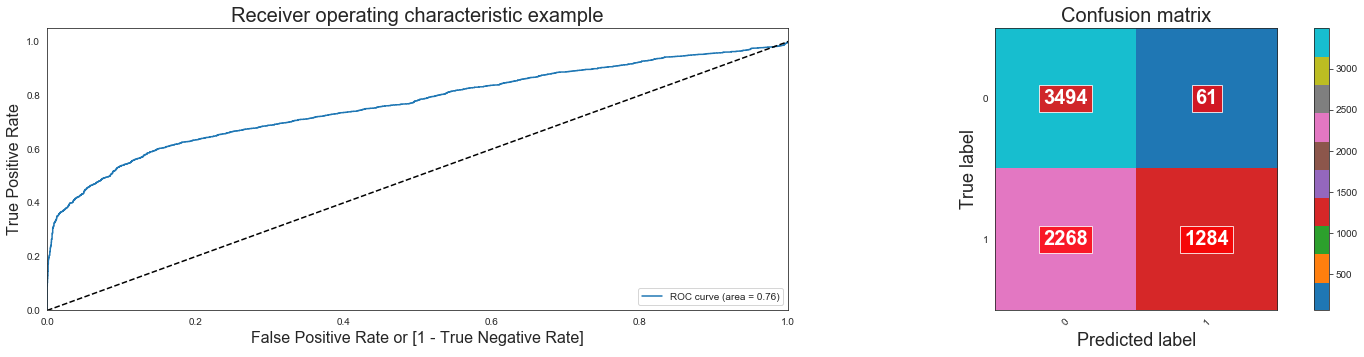

In [450]:
y_test_pred_cnn = cnn.predict(xtest).ravel()
y_test_pred_cnn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_cnn  }) #.reshape(-1)

cnn_auc_test, cnn_recall_test, cnn_precision_test, cnn_f1_test = \
                        draw_roc(y_test_pred_cnn.Class, y_test_pred_cnn.Class_Prob,True,.7)

((7107,), (7110,))

# <font color=blue> Section 5: Saving Results of All the Models</font>

### <font color=green> Results WITHOUT Addressing Imbalance Issue</color>

In [361]:
if option==0:
    normal_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, catb_auc_test, gnb_auc_test, sgd_auc_test, dnn_auc_test, cnn_auc_test]

    normal_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                xgb_recall_test, adbc_recall_test, catb_recall_test, gnb_recall_test, sgd_recall_test, dnn_recall_test, cnn_recall_test]

    normal_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                xgb_precision_test, adbc_precision_test, catb_precision_test, gnb_precision_test, sgd_precision_test, dnn_precision_test, cnn_precision_test]

    normal_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, catb_f1_test, gnb_f1_test, sgd_f1_test, dnn_f1_test, cnn_f1_test]

    normal_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'CatBoost','Naive Bayes', 'SGD', "DNN","CNN"],
        'AUC_Score': normal_roc,
        'Recall_Score': normal_recall,
        'Precision_Score': normal_precision,
        'F1_Score': normal_f1})

    print(normal_model_result.sort_values(by='AUC_Score', ascending=False))

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
5                  LGBM       0.99          0.86             0.96      0.91
0   Logistic Regression       0.98          0.85             0.96      0.90
1                   GLM       0.98          0.85             0.94      0.89
9              AdaBoost       0.98          0.84             0.95      0.89
10             CatBoost       0.98          0.86             0.94      0.90
13                  DNN       0.98          0.84             0.97      0.90
3         Random Forest       0.97          0.86             0.98      0.92
11          Naive Bayes       0.97          0.84             0.50      0.63
12                  SGD       0.97          0.84             0.50      0.63
14                  CNN       0.95          0.77             0.98      0.86
2                   KNN       0.94          0.84             0.97      0.90
8               XGBoost       0.93          0.86             0.96      0.91
4         De

### <font color=green> Results with RandomOverSampler</font>

In [393]:
if option==1:
    ros_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    ros_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    ros_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    ros_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    ros_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
        'AUC_Score':ros_roc,
        'Recall_Score': ros_recall,
        'Precision_Score': ros_precision,
        'F1_Score': ros_f1})

    print(ros_model_result.sort_values(by='AUC_Score', ascending=False))

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
5                  LGBM       0.99          0.87             1.00      0.93
0   Logistic Regression       0.98          0.89             0.97      0.93
1                   GLM       0.98          0.89             0.97      0.93
9              AdaBoost       0.98          0.88             0.97      0.92
3         Random Forest       0.97          0.87             1.00      0.93
10          Naive Bayes       0.97          0.87             0.96      0.92
11                  SGD       0.97          0.87             0.96      0.92
2                   KNN       0.93          0.87             0.99      0.93
8               XGBoost       0.93          0.87             0.99      0.93
7                   SVM       0.91          0.84             0.99      0.91
4         Decision Tree       0.89          0.79             0.99      0.88
6            Perceptron       0.89          0.84             0.93      0.88


### <font color=green> Results with Smote</font>

In [415]:
if option==2:
    smote_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    smote_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    smote_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    smote_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    smote_model_result = pd.DataFrame({
    'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
              'Decision Tree', 'LGBM', 'Perceptron','SVM',
              'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
    'AUC_Score': smote_roc,
    'Recall_Score': smote_recall,
    'Precision_Score': smote_precision, 
    'F1_Score': smote_f1})

    print(smote_model_result.sort_values(by='AUC_Score', ascending=False))

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
0   Logistic Regression       0.99          0.90             0.97      0.94
1                   GLM       0.99          0.90             0.97      0.94
5                  LGBM       0.99          0.89             0.99      0.94
9              AdaBoost       0.99          0.92             0.97      0.95
3         Random Forest       0.98          0.87             0.99      0.93
2                   KNN       0.96          0.91             0.99      0.94
10          Naive Bayes       0.96          0.86             0.97      0.91
11                  SGD       0.96          0.86             0.97      0.91
7                   SVM       0.94          0.90             0.99      0.94
8               XGBoost       0.94          0.89             0.99      0.94
4         Decision Tree       0.93          0.89             0.97      0.93
6            Perceptron       0.89          0.88             0.91      0.89


### <font color=green>Results with AdaSyn</font>

In [451]:
if option==3:
    adasyn_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    adasyn_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    adasyn_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    adasyn_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    adasyn_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
    'AUC_Score': adasyn_roc,
    'Recall_Score': adasyn_recall,
    'Precision_Score': adasyn_precision,
    'F1_Score': adasyn_f1 })

    print(adasyn_model_result.sort_values(by='AUC_Score', ascending=False))

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
5                  LGBM       0.98          0.63             0.99      0.77
3         Random Forest       0.96          0.74             0.94      0.83
0   Logistic Regression       0.95          0.73             0.92      0.81
1                   GLM       0.95          0.87             0.88      0.87
9              AdaBoost       0.95          0.83             0.92      0.87
6            Perceptron       0.89          0.92             0.86      0.89
10          Naive Bayes       0.89          0.47             0.89      0.61
11                  SGD       0.89          0.47             0.89      0.61
2                   KNN       0.84          0.62             0.97      0.76
8               XGBoost       0.84          0.72             0.94      0.82
4         Decision Tree       0.79          0.62             0.94      0.75
7                   SVM       0.76          0.53             0.98      0.69


# <font color=blue> Section 6: Comparing All the Models and all Data Imbalancing Methods</font>

### <font color=red>Before you move ahead please ensure you have run all the models with all data balancing methods. It means section 3, section 4 and Section 5 are run 4 time. 1st time for Normal (without data balancing), 2nd time for RandomOverSampler, 3rd time for Smote, 4th time for AdaSyn</font>

#### Mearge All Model, All Metrics Results Together

In [452]:
all_models1 = pd.merge(normal_model_result,ros_model_result,how="inner", on="Model",suffixes=["_normal","_ros"])
all_models2 = pd.merge(smote_model_result,adasyn_model_result,how="inner", on="Model",suffixes=["_smote","_adasyn"])
all_models = pd.merge(all_models1,all_models2,how="inner", on="Model")

In [453]:
all_models

,Model,AUC_Score_normal,Recall_Score_normal,Precision_Score_normal,F1_Score_normal,AUC_Score_ros,Recall_Score_ros,Precision_Score_ros,F1_Score_ros,AUC_Score_smote,Recall_Score_smote,Precision_Score_smote,F1_Score_smote,AUC_Score_adasyn,Recall_Score_adasyn,Precision_Score_adasyn,F1_Score_adasyn
0,Logistic Regression,0.98,0.85,0.96,0.90,0.98,0.89,0.97,0.93,0.99,0.90,0.97,0.94,0.95,0.73,0.92,0.81
1,GLM,0.98,0.85,0.94,0.89,0.98,0.89,0.97,0.93,0.99,0.90,0.97,0.94,0.95,0.87,0.88,0.87
2,KNN,0.94,0.84,0.97,0.90,0.93,0.87,0.99,0.93,0.96,0.91,0.99,0.94,0.84,0.62,0.97,0.76
3,Random Forest,0.97,0.86,0.98,0.92,0.97,0.87,1.00,0.93,0.98,0.87,0.99,0.93,0.96,0.74,0.94,0.83
4,Decision Tree,0.91,0.83,0.80,0.81,0.89,0.79,0.99,0.88,0.93,0.89,0.97,0.93,0.79,0.62,0.94,0.75
5,LGBM,0.99,0.86,0.96,0.91,0.99,0.87,1.00,0.93,0.99,0.89,0.99,0.94,0.98,0.63,0.99,0.77
6,Perceptron,0.90,0.80,0.90,0.85,0.89,0.84,0.93,0.88,0.89,0.88,0.91,0.89,0.89,0.92,0.86,0.89
7,SVM,0.91,0.81,0.96,0.88,0.91,0.84,0.99,0.91,0.94,0.90,0.99,0.94,0.76,0.53,0.98,0.69
8,XGBoost,0.93,0.86,0.96,0.91,0.93,0.87,0.99,0.93,0.94,0.89,0.99,0.94,0.84,0.72,0.94,0.82
9,AdaBoost,0.98,0.84,0.95,0.89,0.98,0.88,0.97,0.92,0.99,0.92,0.97,0.95,0.95,0.83,0.92,0.87


In [454]:
#AUC Score
all_models.iloc[:,[0,1,5,9,13]]
#Best AUC score on Test data with Any model is .99. This result is given the model based on LBGM, GLM algorithm.
#Smote & Adasyn both are equally good.

,Model,AUC_Score_normal,AUC_Score_ros,AUC_Score_smote,AUC_Score_adasyn
0,Logistic Regression,0.98,0.98,0.99,0.95
1,GLM,0.98,0.98,0.99,0.95
2,KNN,0.94,0.93,0.96,0.84
3,Random Forest,0.97,0.97,0.98,0.96
4,Decision Tree,0.91,0.89,0.93,0.79
5,LGBM,0.99,0.99,0.99,0.98
6,Perceptron,0.90,0.89,0.89,0.89
7,SVM,0.91,0.91,0.94,0.76
8,XGBoost,0.93,0.93,0.94,0.84
9,AdaBoost,0.98,0.98,0.99,0.95


In [455]:
#F1 Score
all_models.iloc[:,[0,4,8,12,16]]
#Best F1 score on Test data with Any model is .97. This result is given the model based on XGBoost algorithm.
#Smote is the best data imbalance method in this case.

,Model,F1_Score_normal,F1_Score_ros,F1_Score_smote,F1_Score_adasyn
0,Logistic Regression,0.90,0.93,0.94,0.81
1,GLM,0.89,0.93,0.94,0.87
2,KNN,0.90,0.93,0.94,0.76
3,Random Forest,0.92,0.93,0.93,0.83
4,Decision Tree,0.81,0.88,0.93,0.75
5,LGBM,0.91,0.93,0.94,0.77
6,Perceptron,0.85,0.88,0.89,0.89
7,SVM,0.88,0.91,0.94,0.69
8,XGBoost,0.91,0.93,0.94,0.82
9,AdaBoost,0.89,0.92,0.95,0.87


In [456]:
#Recall Score
all_models.iloc[:,[0,2,6,10,14]]   
#Best Recall score on Test data with Any model is .94. This is based on threshold limit of 0.5 
#This result is given the model based on Logistic Regression, LGBM, XGBoost, AdaBoost.
#Smote is the best data imbalance method in this case.

#It means .06 or 6% False Negative (Type II Error) cases with these models.
#It means pushing 6% normal transactions into fraud transaction category and taking action as per the banking processes
#This is may upset many of the bank customers. Amount money at risk because of 6% tranxs of large bank may be fraud
#is high. Therefore if you are large bank then in name of security you can afford to take such actions.

#Smaller banks will not choose the model if Recall score is high. Because many of their customers many 
#switch their bank. Offcourse restricing 6% good transactions will hit them badly bad but more then 
#that may be loss of customer.

,Model,Recall_Score_normal,Recall_Score_ros,Recall_Score_smote,Recall_Score_adasyn
0,Logistic Regression,0.85,0.89,0.90,0.73
1,GLM,0.85,0.89,0.90,0.87
2,KNN,0.84,0.87,0.91,0.62
3,Random Forest,0.86,0.87,0.87,0.74
4,Decision Tree,0.83,0.79,0.89,0.62
5,LGBM,0.86,0.87,0.89,0.63
6,Perceptron,0.80,0.84,0.88,0.92
7,SVM,0.81,0.84,0.90,0.53
8,XGBoost,0.86,0.87,0.89,0.72
9,AdaBoost,0.84,0.88,0.92,0.83


In [457]:
#Precision Score
all_models.iloc[:,[0,3,7,11,15]]
#Best Recall score on Test data with Any model is 1. This is based on threshold limit of 0.5 
#This result is given the model based on GLM, RandomForest, LGBM, Perceptron,
#RandomOverSampler, Smote, AdaSyn are all are giving equally good results.

#It means thre 0% False Positive (Type I) Case. If model is predicting x number of cases fraud then 
#at .5 threshold all those cases are detected correctly.

,Model,Precision_Score_normal,Precision_Score_ros,Precision_Score_smote,Precision_Score_adasyn
0,Logistic Regression,0.96,0.97,0.97,0.92
1,GLM,0.94,0.97,0.97,0.88
2,KNN,0.97,0.99,0.99,0.97
3,Random Forest,0.98,1.00,0.99,0.94
4,Decision Tree,0.80,0.99,0.97,0.94
5,LGBM,0.96,1.00,0.99,0.99
6,Perceptron,0.90,0.93,0.91,0.86
7,SVM,0.96,0.99,0.99,0.98
8,XGBoost,0.96,0.99,0.99,0.94
9,AdaBoost,0.95,0.97,0.97,0.92


# <font color=blue>Section 7: Visuzalise Results of Various Oversampling Methods</font>

### Random Oversampling

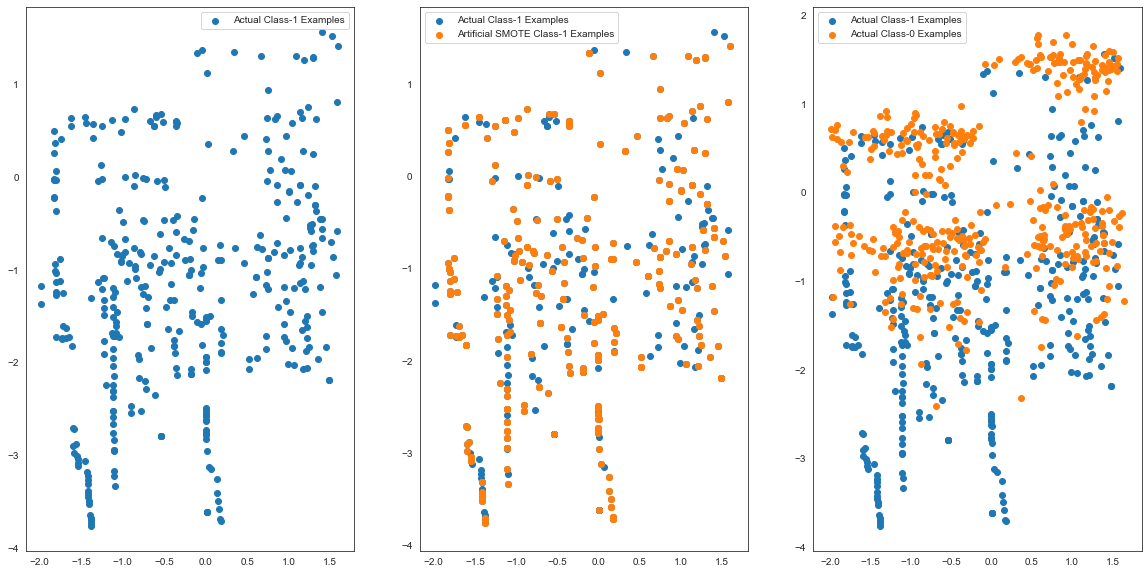

In [458]:
X_train_ros_1 = X_train_ros[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1.iloc[:X_train_1.shape[0], 0], 
            X_train_ros_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], 
            X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### SMOTE : Synthetic Minority Over-sampling Technique

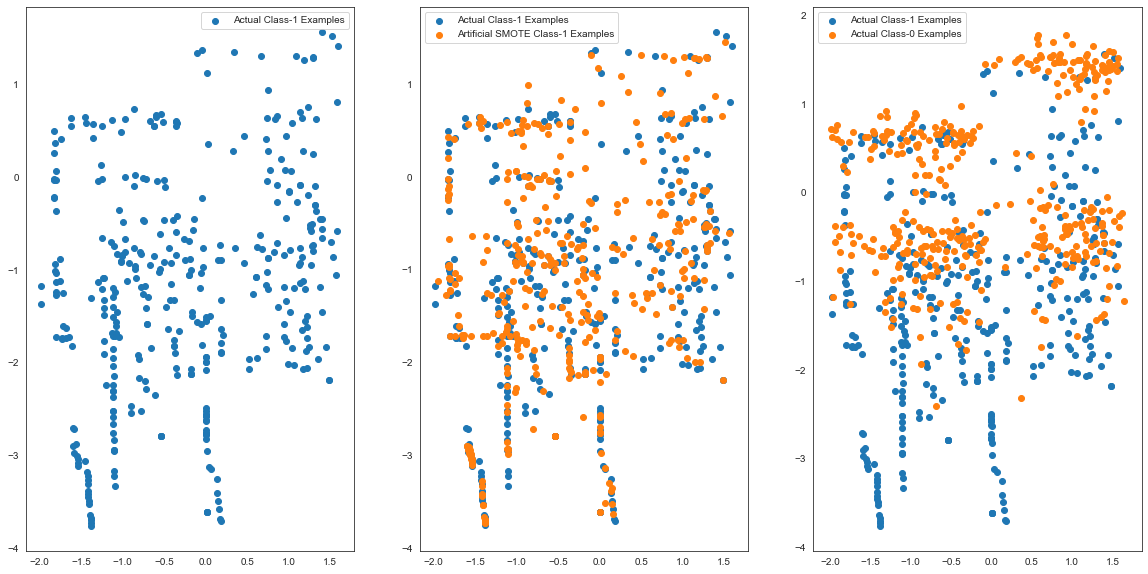

In [459]:
X_train_smote_1 = X_train_smote[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]


plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], 
            X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### ADASYN : Adaptive Synthetic Sampling Method

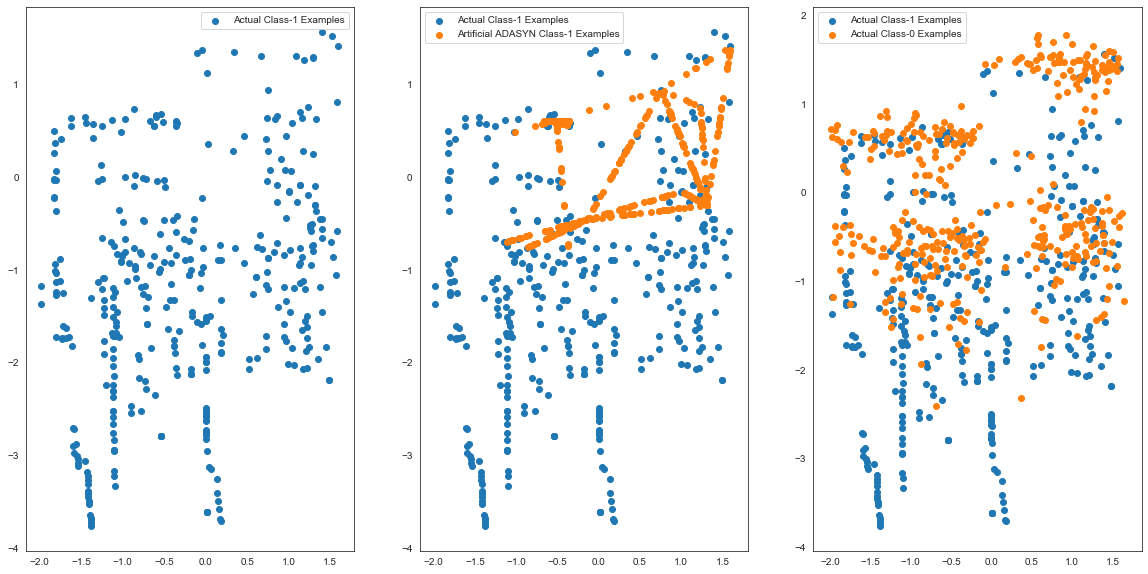

In [460]:
X_train_adasyn_1 = X_train_adasyn[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], 
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# <font color=blue> Secion 8: Final Conslusion </font>

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.99


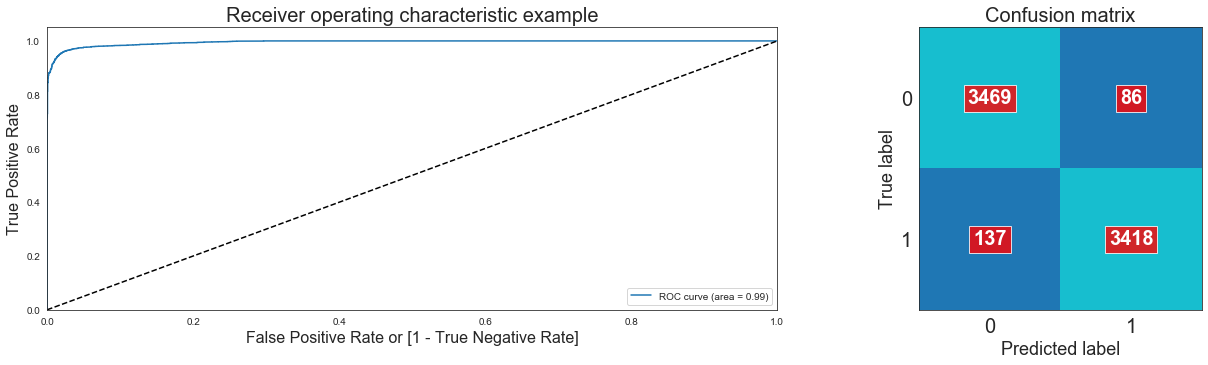

In [575]:
oo=option
option=2
#Imbalance Method: Smote
#Selected Algorithm: LGBM (Light Gradient Boosting Machine)

clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42,)

clf.fit(X_train_smote,y_train_smote)
y_test_pred_final = clf.predict_proba(X_test)[:,1:2]

y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_final.reshape(-1) })

final_auc_test, final_recall_test, final_precision_test, final_f1_test = \
                        draw_roc(y_test_pred_final.Class, y_test_pred_final.Class_Prob,True,.039)

In [577]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print ("Recall Score",final_recall_test) 

print ("Precision Score",final_precision_test )

print ("F1 Score", final_f1_test )

print('Test auc =', final_auc_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred_final.Class_Prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Treshold",threshold)

Recall Score 0.96
Precision Score 0.98
F1 Score 0.97
Test auc = 0.99
Treshold 0.0397009601045582


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 5 V4
2nd Top var = 15 V14
3rd Top var = 27 V26


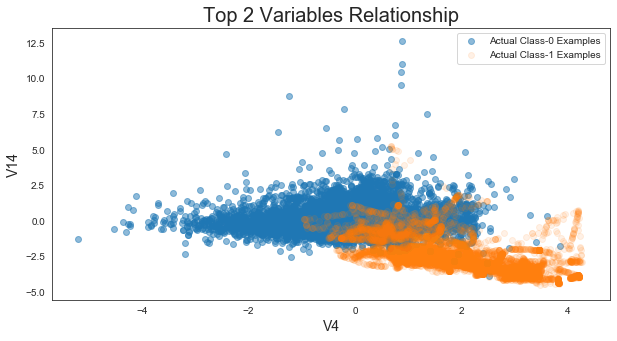

In [502]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])
third_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-3])

print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1, X_train.columns[top_var_index])
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1, X_train.columns[second_top_var_index])
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1, X_train.columns[third_top_var_index])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index], 
            label='Actual Class-0 Examples', alpha=.5)
plt.scatter( X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples', alpha=.1)
plt.xlabel(X_train.columns[top_var_index], fontsize=14)
plt.ylabel(X_train.columns[second_top_var_index], fontsize=14)
plt.title("Top 2 Variables Relationship", fontsize=20)
plt.legend()

# <font color=blue> Secion 9: Financial Benefits of the Model </font>

In [ ]:
#Total Fraud transactions in 2 days are 384. In one day 192 fraud transaction (average)
#Total normal transaction in 2 days are 284807. In one day 142,403 normal transations (average)
#Average fraud transaction is $122. In a 6 months FRAUD Tranactions of $122*6*30*192 = 42,16,320 i.e $ 4.2 million 
#can happen in the bank. 

#Next Six Month Approx Fraud Transactions: 34,560
#Next Six Month Approx Normal Transactions:51,265,260

#Recall score is 96% means 4% is False Negative it means everyday 8 normal transactions will be marked as fraud. 
#It also means 184 tranaction out of 192 fraud transactions can be caught using our model.
#i.e. out of 34560 fraud transactions our model can detect 33120 correctly. 
#And 1440 transaction will be False Negative. This can lead to customer disatisfaction. 
#To avoid this bank can make 1440 immedaitely call to customer and verify. 

#Precision score is 98% means 2% is False Positive it means everyday 4 fraud transactions will be marked as normal.
#It means this is loss of money.

#If bank calls to customer for the transactions which are flagged as False Positve (1440) & False Negative (720).
#If cost of each call is Rs. 10 #(let's say call centre is India) then bank need to make
#cost of the call is Rs 21,600 over 6 months.

#If developing this kind model for bank takes 2 weeks efforts. Cost of developing this model (inlcuding infrastructure, 
#human resource code) can be approx $50K + Rs. 22K. Hoping we need to retrain our model every 6 months bank will be 
#spending approx $25K every six month to and save $4.2 millions.